### Problem Description
A Chinese automobile company Teclov_chinese aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. Essentially, the company wants to know:

• Which variables are significant in predicting the price of a car

• How well those variables describe the price of a car Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market.

### Business Goal¶
You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for the management to understand the pricing dynamics of a new market. Data Preparation

• There is a variable named CarName which is comprised of two parts:

- the first word is the name of 'car company' and the second is the 'car model'. For example, chevrolet impala has 'chevrolet' as the car company name and 'impala' as the car model name. You need to consider only company name as the independent variable for model building.

In [1]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)
import seaborn as sns

pd.set_option('display.max_columns', None)

## Read Data

In [2]:
data = pd.read_csv('CarPrice_Assignment.csv')
print("Dimension of our data set is: ")
print(data.shape)
data.head()

Dimension of our data set is: 
(205, 26)


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

Dataset is clean and no substitution of Null values is required

## Cleaning Data

1. Separate the CarName variable to two columns: CompanyName and CarModel

In [4]:
CompanyName = data['CarName'].apply(lambda x : x.split(' ')[0])
data.insert(3,"CompanyName",CompanyName)
data.drop(['CarName'],axis=1,inplace=True)
data.drop(['car_ID'],axis=1,inplace=True)

data.head()

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


2. Examine categorical variables and correct them if spelling errors are found

In [5]:
def get_variable_type(element) :
    """
     Check that the columns are of continuous or categorical variable.
     The assumption is that if:
                  unique number < 20 then we assume it's categorical
                  unique number >= 20 and dtype = [int64 or float64] then we assume it's continuous
     """
    if element==0:
        return "Not Known"
    elif element < 20 and element!=0 :
        return "Categorical"
    elif element >= 20 and element!=0 :
        return "Contineous"
    
def predict_variable_type(metadata_matrix):
    metadata_matrix["Variable_Type"] = metadata_matrix["Variabel_Uniques_Count"].apply(get_variable_type).astype(str)
    metadata_matrix["frequency"] = metadata_matrix["Null_Count"] - metadata_matrix["Null_Count"]
    metadata_matrix["frequency"].astype(int)
    return metadata_matrix 

def get_meta_data(dataframe) :
    """
    Method to get metadata about any passed dataset
    """
    metadata_matrix = pd.DataFrame({
                    'Datatype' : dataframe.dtypes.astype(str), 
                    'Non_Null_Count': dataframe.count(axis = 0).astype(int), 
                    'Null_Count': dataframe.isnull().sum().astype(int),
                    'Null_Percentage': dataframe.isnull().sum()/len(dataframe) * 100, 
                    'Variabel_Uniques_Count': dataframe.nunique().astype(int) 
                     })
    
    metadata_matrix = predict_variable_type(metadata_matrix)
    return metadata_matrix

def list_potential_categorical_type(dataframe,data) :
    print("*********potential categorical data type columns*********")
    metadata_matrix_categorical = dataframe[dataframe["Variable_Type"] == "Categorical"]
    
    length = len(metadata_matrix_categorical)
    if length == 0 :
        print("No categorical columns in a given dataset.")  
    else :    
        metadata_matrix_categorical = metadata_matrix_categorical.filter(["Datatype","Variabel_Uniques_Count"])
        metadata_matrix_categorical.sort_values(["Variabel_Uniques_Count"], axis=0,ascending=False, inplace=True)
        col_to_check = metadata_matrix_categorical.index.tolist()
        name_list = []
        values_list = []
        
        for name in col_to_check :
            name_list.append(name)
            values_list.append(data[name].unique())
        
        temp = pd.DataFrame({"index":name_list,"Variabel_Uniques":values_list})
        metadata_matrix_categorical = metadata_matrix_categorical.reset_index()
        metadata_matrix_categorical = pd.merge(metadata_matrix_categorical,temp,how='inner',on='index')
        display(metadata_matrix_categorical.set_index("index"))

In [6]:
metadata = get_meta_data(data)

#List potential columns of categorical variables
list_potential_categorical_type(metadata,data)

*********potential categorical data type columns*********


,Datatype,Variabel_Uniques_Count,Variabel_Uniques
index,,,
fuelsystem,object,8,"[mpfi, 2bbl, mfi, 1bbl, spfi, 4bbl, idi, spdi]"
enginetype,object,7,"[dohc, ohcv, ohc, l, rotor, ohcf, dohcv]"
cylindernumber,object,7,"[four, six, five, three, twelve, two, eight]"
symboling,int64,6,"[3, 1, 2, 0, -1, -2]"
carbody,object,5,"[convertible, hatchback, sedan, wagon, hardtop]"
drivewheel,object,3,"[rwd, fwd, 4wd]"
fueltype,object,2,"[gas, diesel]"
aspiration,object,2,"[std, turbo]"
doornumber,object,2,"[two, four]"


But there is another variable that is not considered categorical. It's the column "CompanyName". Let's see are there any repetitive values?

In [7]:
data.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In reviewing the above data, we found that few company names were identical but misspelled, such as:

1. 'maxda' Et 'mazda' ================> mazda
2. 'porsche' Et 'porcshce' ===========> porsche
3. 'toyota' Et 'toyouta' =============> toyota
4. 'vokswagen' Et 'volkswagen','vw' ==> volkswagen
5. 'Nissan' Et 'nissan' ==============> 'nissan'

So we have to adjust things by replacing the values with one identical variable:

In [8]:
data = data.replace(to_replace ="maxda", value ="mazda") 
data = data.replace(to_replace ="porcshce", value ="porsche") 
data = data.replace(to_replace ="toyouta", value ="toyota") 
data = data.replace(to_replace ="vokswagen", value ="volkswagen") 
data = data.replace(to_replace ="vw", value ="volkswagen")
data = data.replace(to_replace ="Nissan", value ="nissan")

In [9]:
data.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

### Exploratory of Data

Since the independent variable (i.e Price) is continuous numerical variable, and there is many dependat variables, we we will use Multiple linear regression

A. Key assumptions of multiple regression:

To perform multiple linear regression, the following assumptions must be met:

--- Before model construction: ---

1. Linear relationship: The dependent variable Y (i.e Price) has a linear relationship with the independent variables X, and to verify this, one must ensure that the XY dispersion graph is linear.
2. No multi-collinearity: Multiple regression assumes that independent variables X are not strongly correlated with each other. This assumption is tested using Variance Inflation Factor (VIF) or using Correlation Matrix .
--- After: Residual analysis of the model ---

1. Normality of Error Distribution
2. Independence of errors
3. Homo-scedasticity

## Dependent variable visualization: Price

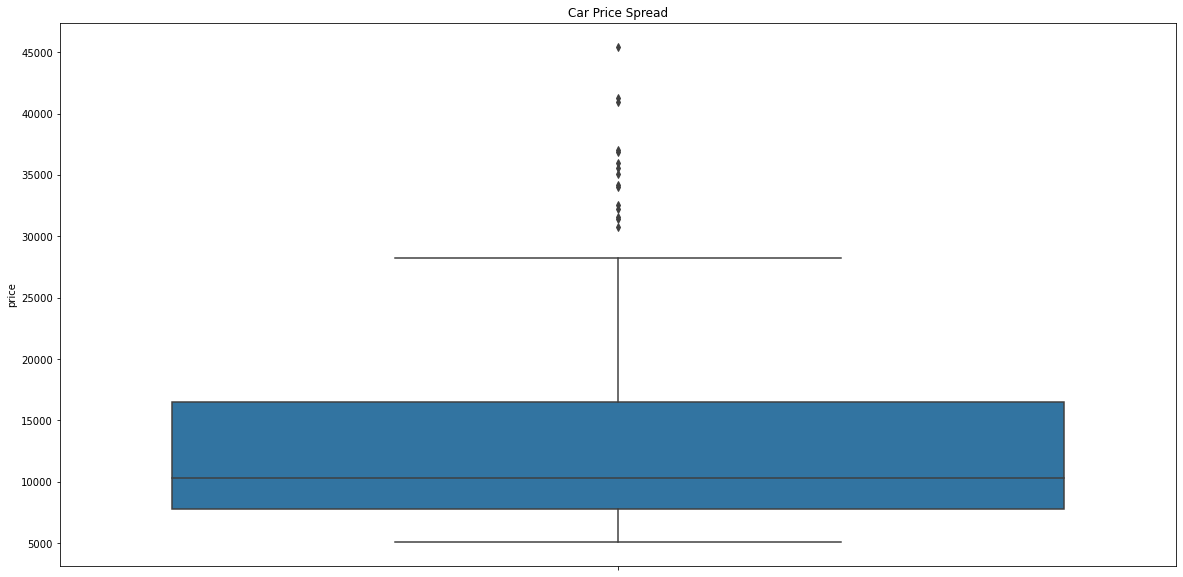

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64


In [10]:
plt.title('Car Price Spread')
sns.boxplot(y=data.price)
plt.show()
print(data.price.describe())

According to the box-mustache, the price field has an average around 13K and a median around 10k with the most expensive car values at 45k and the cheapest cars at 5k.

Since we have mean > median, then our distribution is positively asymmetric, as we can see in the following histogram:

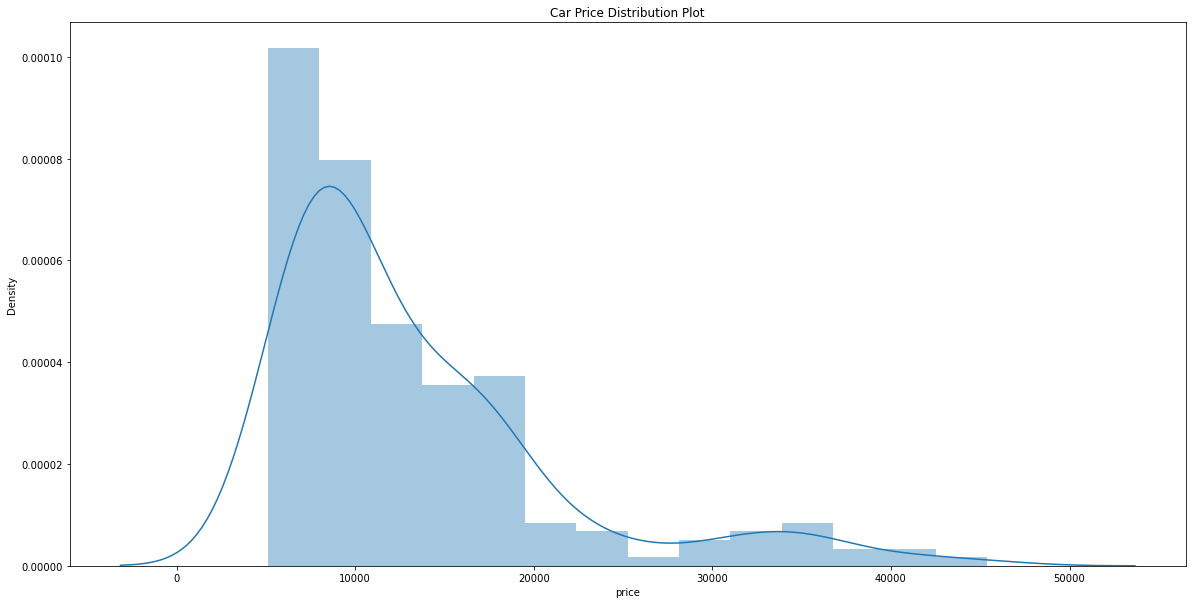

In [11]:
plt.title('Car Price Distribution Plot')
sns.distplot(data.price)
plt.show()

Conclusion

Which means that most of the prices offered by this company are low.

As seen below, we have 75% prices are around 16k, or 25% between 17k and 45k.

In [12]:
print(data.price.describe())

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64


## Visualization of independent variables:

### ** Numerical **

#### I. Check the linear relationship between the dependent variable "Price" and the numerical independent variables

Draw XY scatter plot, and check are they linear or not?

In [13]:
import scipy
from scipy.stats.stats import pearsonr

def pairplot(x_axis,y_axis) :
    sns.pairplot(data,x_vars=x_axis,y_vars=y_axis,height=4,aspect=1,kind="scatter")
    plt.show()

In [14]:
#Determiner la variable indépendante
y_vars=['price']

Price VS Wheelbase - curbweight - boreratio

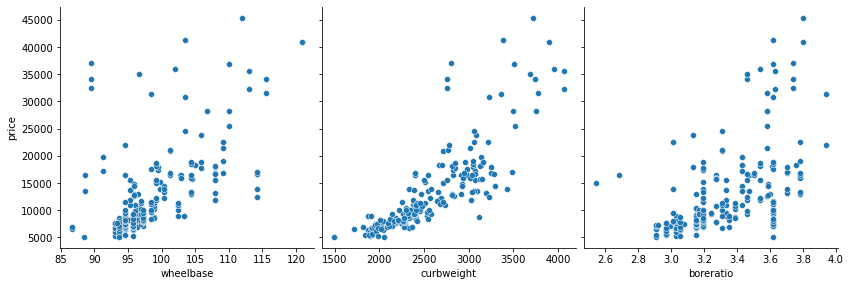

At first glance, the 3 variables are positively correlated but spread at higher values.

We can make sure of this by looking at the Coefficient of Correlation

Coefficient of Correlation between Price and wheelbase: 57.781559829215 %
Correlation coefficient between Price and curbweight: 83.53048793372965 %
Correlation coefficient between Price and boreratio:  55.317323679844364 %


In [15]:
x_vars=['wheelbase','curbweight','boreratio']
pairplot(x_vars,y_vars)
print("At first glance, the 3 variables are positively correlated but spread at higher values.")

p1=data['wheelbase']
p2=data['curbweight']
p3=data['boreratio']

pearson_coeff, p_value = pearsonr(p1,data['price'])
print('\nWe can make sure of this by looking at the Coefficient of Correlation')
print('\nCoefficient of Correlation between Price and wheelbase:',pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p2,data['price'])
print('Correlation coefficient between Price and curbweight:',pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p3,data['price'])
print('Correlation coefficient between Price and boreratio: ',pearson_coeff*100,'%')

Price VS carlength - carwidth - carheight

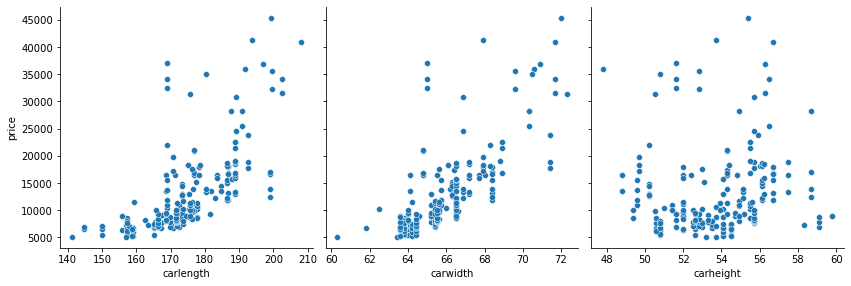

Carlength and Carwidth are more correlated than carheight which is more spread out but positive.

We can make sure of this by looking at the Coefficient of Correlation

Correlation coefficient between Price and carlength: 68.29200156779622 %
Correlation coefficient between Price and carwidth:  75.93252997415114 %
Correlation coefficient between Price and carheight:  11.933622657049444 %


In [16]:
x_vars=['carlength','carwidth', 'carheight']
pairplot(x_vars,y_vars)
print("Carlength and Carwidth are more correlated than carheight which is more spread out but positive.")

p1=data['carlength']
p2=data['carwidth']
p3=data['carheight']

pearson_coeff, p_value = pearsonr(p1,data['price'])
print('\nWe can make sure of this by looking at the Coefficient of Correlation')
print('\nCorrelation coefficient between Price and carlength:',pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p2,data['price'])
print('Correlation coefficient between Price and carwidth: ',pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p3,data['price'])
print('Correlation coefficient between Price and carheight: ',pearson_coeff*100,'%')

Price VS enginesize - horsepower - stroke

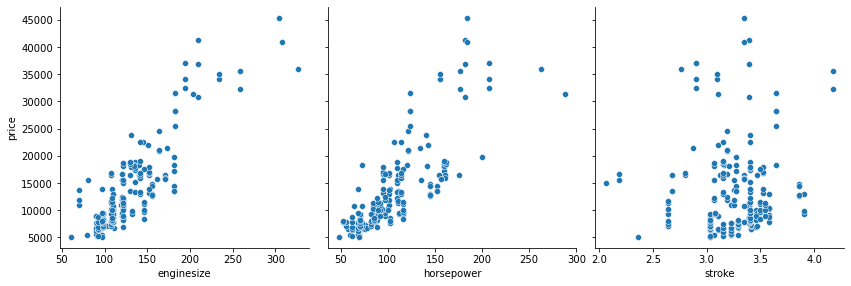

Enginesize and Horsepower are positively correlated, but Stroke is more spread out (may not be related).

We can make sure of this by looking at the Coefficient of Correlation

Correlation coefficient between Price and enginesize:  87.41448025245117 %
Correlation coefficient between Price and horsepower:  80.81388225362217 %
Correlation coefficient between Price and stroke:  7.9443083881931 %


In [17]:
x_vars=['enginesize','horsepower','stroke']
pairplot(x_vars,y_vars)
print("Enginesize and Horsepower are positively correlated, but Stroke is more spread out (may not be related).")

p1=data['enginesize']
p2=data['horsepower']
p3=data['stroke']

pearson_coeff, p_value = pearsonr(p1,data['price'])
print('\nWe can make sure of this by looking at the Coefficient of Correlation')
print('\nCorrelation coefficient between Price and enginesize: ',pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p2,data['price'])
print('Correlation coefficient between Price and horsepower: ',pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p3,data['price'])
print('Correlation coefficient between Price and stroke: ',pearson_coeff*100,'%')

Price VS compressionratio - peakrpm - symboling

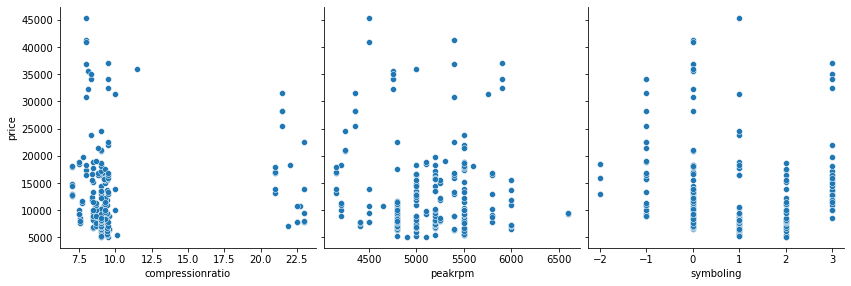

Compressionratio, Peakrpm and symboling are not correlated.

We can make sure of this by looking at the Coefficient of Correlation

Correlation coefficient between Price and compressionratio:  6.798350579944266 %
Correlation coefficient between Price and peakrpm:  -8.526715027785688 %
Correlation coefficient between Price and symboling:  -7.997822464270349 %


In [18]:
x_vars=['compressionratio','peakrpm',"symboling"]
pairplot(x_vars,y_vars)
print("Compressionratio, Peakrpm and symboling are not correlated.")

p1=data['compressionratio']
p2=data['peakrpm']
p3=data['symboling']

pearson_coeff, p_value = pearsonr(p1,data['price'])
print('\nWe can make sure of this by looking at the Coefficient of Correlation')
print('\nCorrelation coefficient between Price and compressionratio: ',pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p2,data['price'])
print('Correlation coefficient between Price and peakrpm: ',pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p3,data['price'])
print('Correlation coefficient between Price and symboling: ',pearson_coeff*100,'%')

Price VS citympg - highwaympg

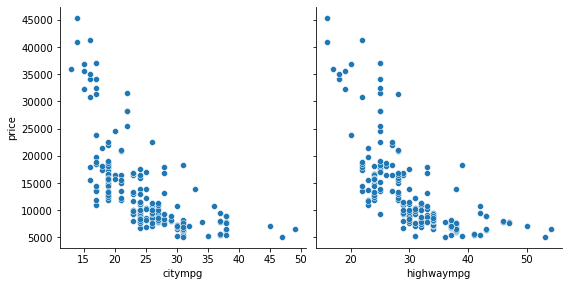

Citympg & Highwaympg are negatively correlated.
The more prices get lower, the higher the distances get, which means that the cheapest cars have better mileage than expensive cars.

We can make sure of this by looking at the Coefficient of Correlation

Correlation coefficient between Price and citympg:  -68.57513360270397 %
Correlation coefficient between Price and highwaympg:  -69.75990916465564 %


In [19]:
x_vars=['citympg', 'highwaympg']
pairplot(x_vars,y_vars)
print('Citympg & Highwaympg are negatively correlated.\nThe more prices get lower, the higher the distances get, which means that the cheapest cars have better mileage than expensive cars.')

p1=data['citympg']
p2=data['highwaympg']

pearson_coeff, p_value = pearsonr(p1,data['price'])
print('\nWe can make sure of this by looking at the Coefficient of Correlation')
print('\nCorrelation coefficient between Price and citympg: ',pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p2,data['price'])
print('Correlation coefficient between Price and highwaympg: ',pearson_coeff*100,'%')

Conclusion

(+) positively correlated variables with Price: wheelbase, carlenght, carwidth, curbweight, enginesize, boreratio, horesepower

(-) negatively correlated variables with Price: citympg, highwaympg

These variables should be kept for a better model, and the other variables should be ignored as they are not correlated with Price

#### II. Checking the multicollinearity between the correlated independent variables above and Price

In [20]:
def heatmap(x,y,dataframe):
    sns.heatmap(dataframe.corr(),cmap="OrRd",annot=True)
    plt.show()

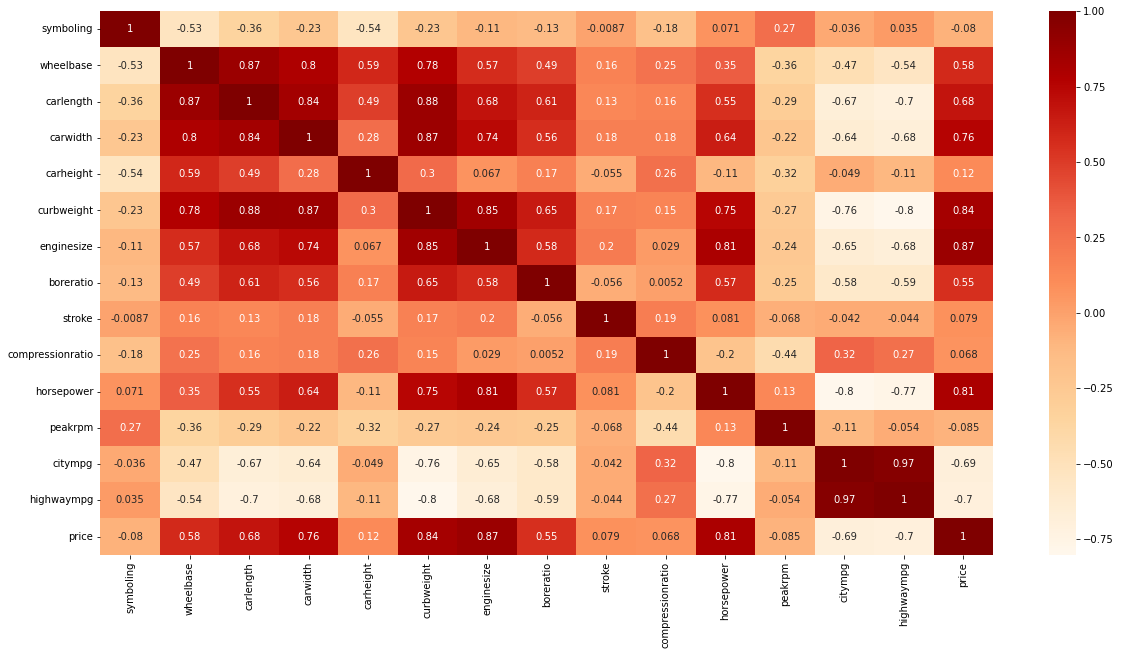

In [21]:
heatmap(20,12,data)

#### a. Examination of the correlation between the variables specific to the dimensions of a car i.e. weight, height etc

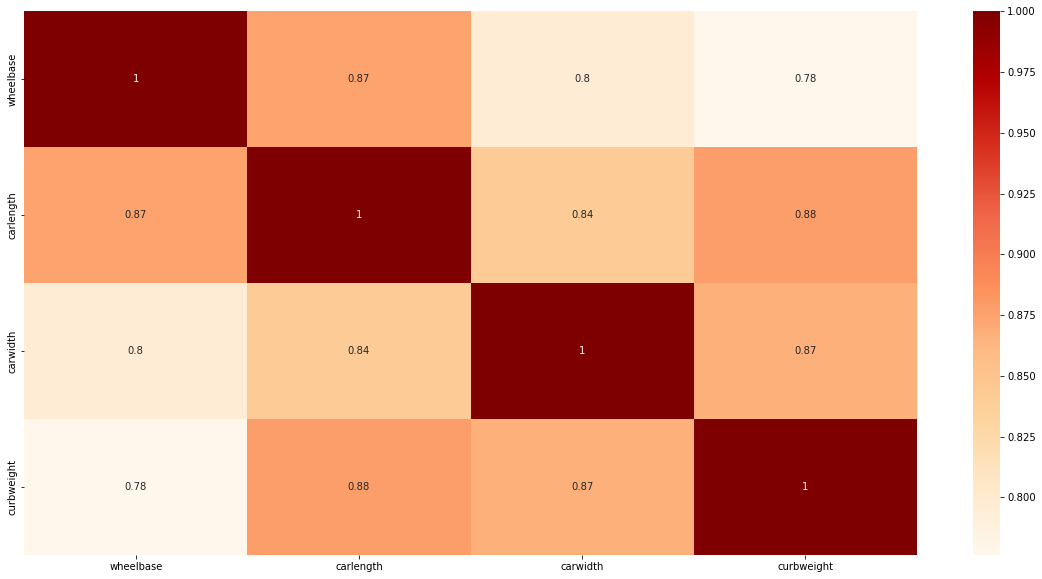

In [22]:
dimension_col_list = ['wheelbase', 'carlength', 'carwidth','curbweight']

heatmap(10,10,data.filter(dimension_col_list))

Wheelbase , carlength, carwidth et curbweight [ 0.80 - 0.88 ] are very correlated and we have to keep only one between them

#### b. Examination of the correlation between the variables specific to the performance of a car

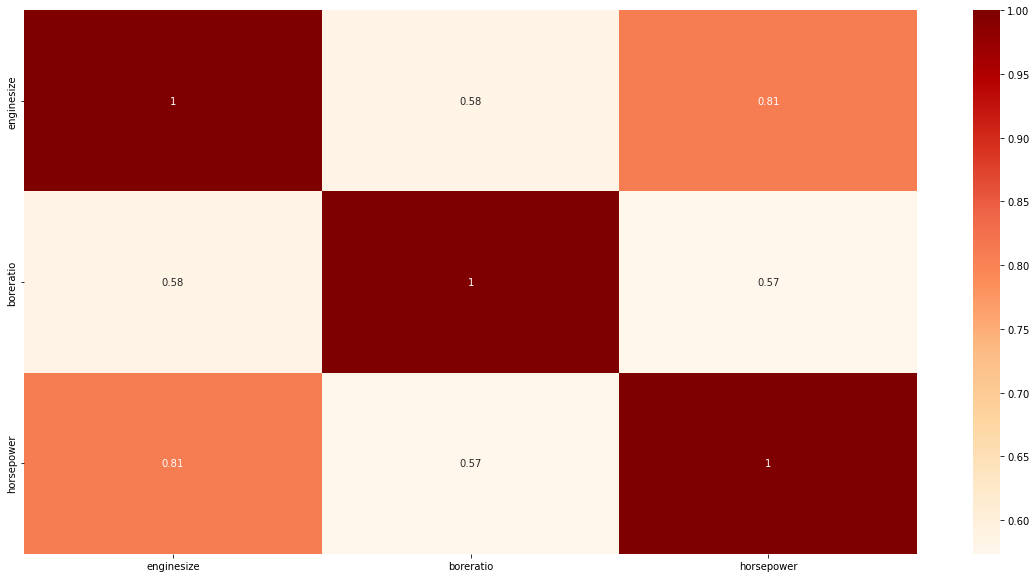

In [23]:
performance_col_list = ['enginesize','boreratio','horsepower']
heatmap(10,10,data.filter(performance_col_list))

Horsepower and enginesize are highly correlated and we need to keep only one.

#### c. Examining the correlation between citympg and highwaympg

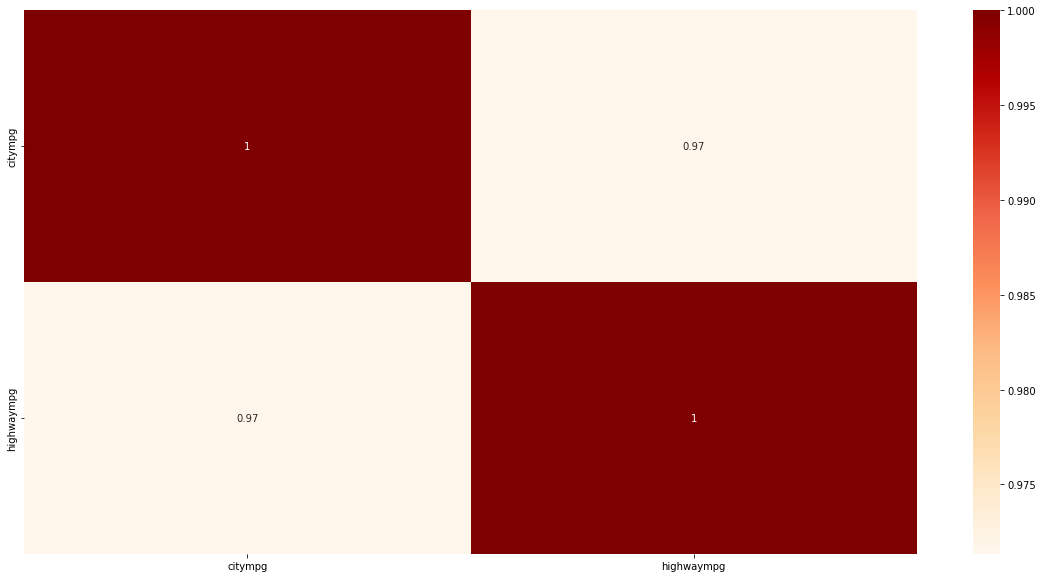

In [24]:
performance_col_list = ['citympg','highwaympg']
heatmap(10,10,data.filter(performance_col_list))

citympg and highwaympg are highly correlated and we need to keep one of them.

### ** Categorical **

Price VS CompanyName

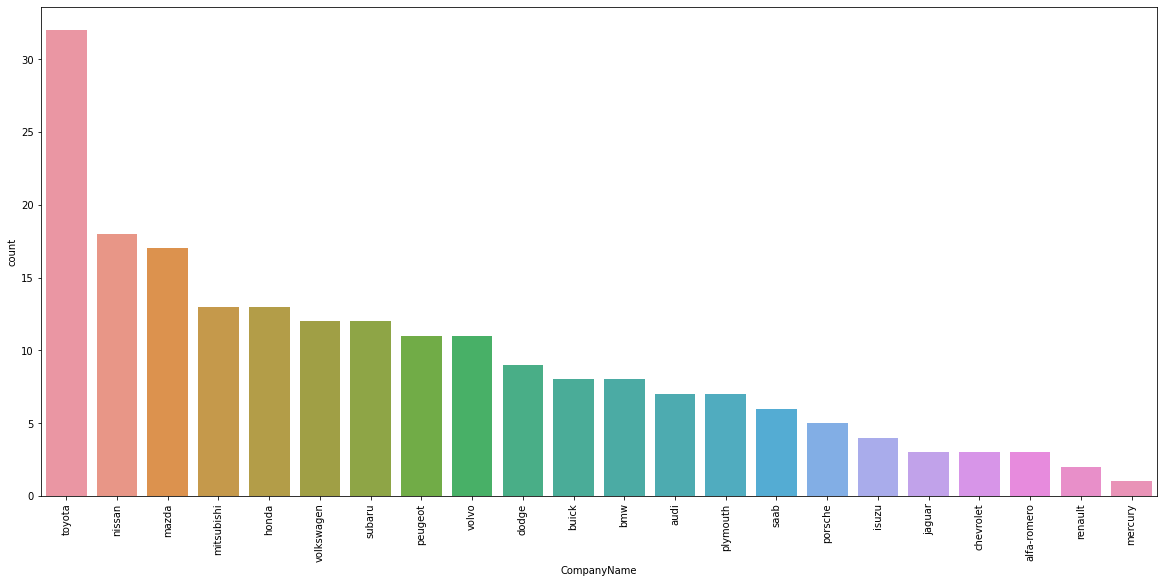

In [25]:
plt.figure(figsize=(20,9))

plt.xticks(rotation = 90)
order = data['CompanyName'].value_counts(ascending=False).index
sns.countplot(x='CompanyName', data=data, order=order)

plt.show()

Looking at the above histogram, Toyota seems to be very popular, followed by Nissan and Mazda.

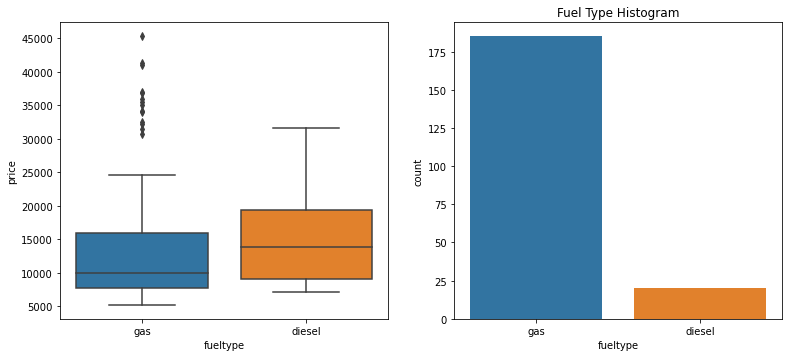

In [26]:
plt.figure(figsize=(20, 12))

plt.subplot(2,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = data)

plt.subplot(2,3,2)
plt.title('Fuel Type Histogram')
order = data['fueltype'].value_counts(ascending=False).index
sns.countplot(x='fueltype', data=data, order=order)

plt.show()

The average price of a diesel car is higher than that of gas cars, which explains, according to the histogram, why the company sold more gas cars than diesel cars.

>>> Note: Existence of Outliers for Gas

Price VS aspiration

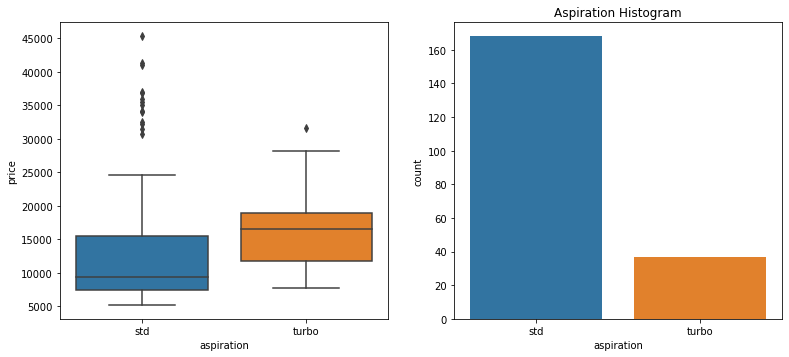

In [27]:
plt.figure(figsize=(20, 12))

plt.subplot(2,3,1)
sns.boxplot(x = 'aspiration', y = 'price', data = data)

plt.subplot(2,3,2)
plt.title('Aspiration Histogram')
order = data['aspiration'].value_counts(ascending=False).index
sns.countplot(x='aspiration', data=data, order=order)

plt.show()

The average price of cars with turbo aspiration is higher than that of standard aspiration, which explains, according to the histogram, why the company sells cars with standard aspiration more than of cars with turbo aspiration.

>>> Note: Existence of Outliers for Turbo and std

Price VS doornumber

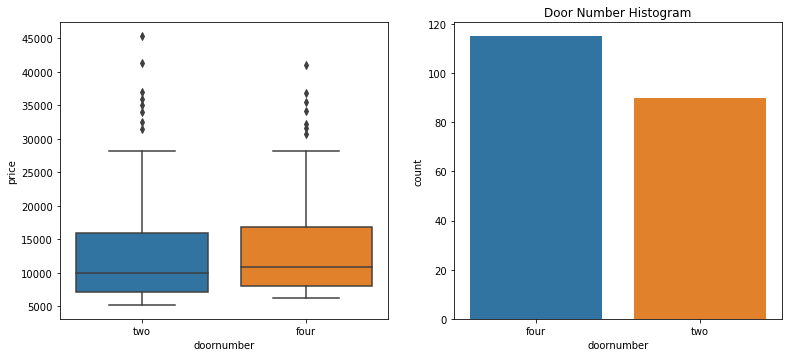

In [28]:
plt.figure(figsize=(20, 12))

plt.subplot(2,3,1)
sns.boxplot(x = 'doornumber', y = 'price', data = data)

plt.subplot(2,3,2)
plt.title('Door Number Histogram')
order = data['doornumber'].value_counts(ascending=False).index
sns.countplot(x='doornumber', data=data, order=order)

plt.show()

doornumber values are pretty close, which means the price is not affected by doornumber

>>> Note: Existence of Outliers in four and two

Price VS enginelocation

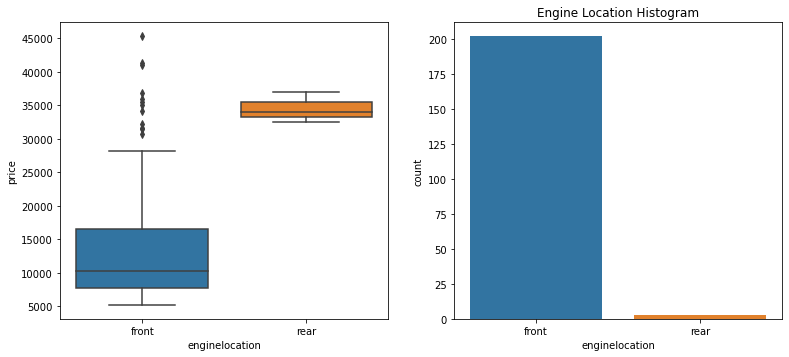

In [29]:
plt.figure(figsize=(20, 12))

plt.subplot(2,3,1)
sns.boxplot(x = 'enginelocation', y = 'price', data = data)

plt.subplot(2,3,2)
plt.title('Engine Location Histogram')
order = data['enginelocation'].value_counts(ascending=False).index
sns.countplot(x='enginelocation', data=data, order=order)

plt.show()

Price VS carbody

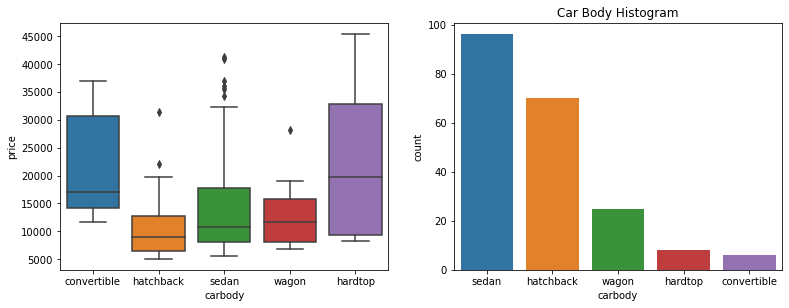

In [30]:
plt.subplot(2,3,1)
sns.boxplot(x='carbody',y='price',data = data)

plt.subplot(2,3,2)
plt.title('Car Body Histogram')
order = data['carbody'].value_counts(ascending=False).index
sns.countplot(x='carbody', data=data, order=order)

plt.show()

It seems that sedan is the most favored.

hardtop has the highest average price.

>>> Note: Existence of Outliers for several values

Price VS fuelsystem



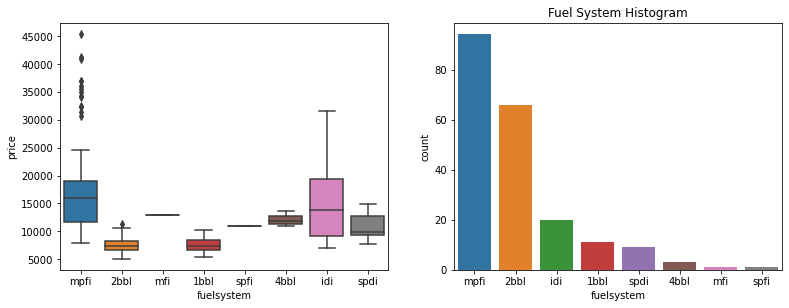

In [31]:
plt.subplot(2,3,1)
sns.boxplot(x='fuelsystem',y='price',data = data)

plt.subplot(2,3,2)
plt.title('Fuel System Histogram')
order = data['fuelsystem'].value_counts(ascending=False).index
sns.countplot(x='fuelsystem', data=data, order=order)

plt.show()

mpfi is the most favored type of fuelsystem , even though it has the highest average price.

>>> Note: Existence of Outliers for mpfi and 2bbl

Price VS enginetype



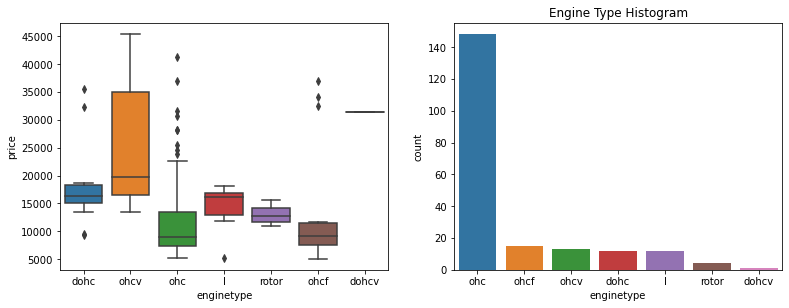

In [32]:
plt.subplot(2,3,1)
sns.boxplot(x='enginetype',y='price',data = data)

plt.subplot(2,3,2)
plt.title('Engine Type Histogram')
order = data['enginetype'].value_counts(ascending=False).index
sns.countplot(x='enginetype', data=data, order=order)

plt.show()

ohc is the most favored engine type.

>>> Note: Existence of Outliers for several values.

Price VS cylindernumber

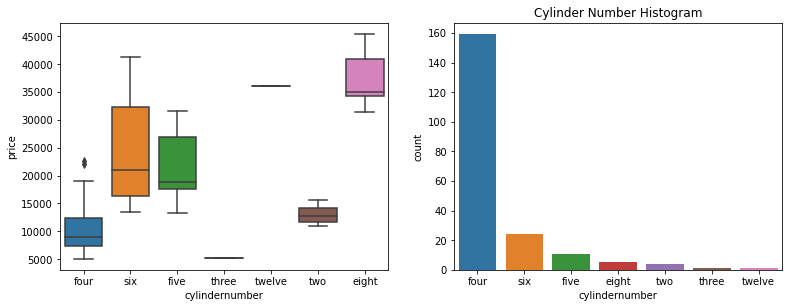

In [33]:
plt.subplot(2,3,1)
sns.boxplot(x='cylindernumber',y='price',data = data)

plt.subplot(2,3,2)
plt.title('Cylinder Number Histogram')
order = data['cylindernumber'].value_counts(ascending=False).index
sns.countplot(x='cylindernumber', data=data, order=order)

plt.show()

The four-cylinder seems to be the most favored.

We can see that expensive cars have eight-cylinder , and four-cylinder are the cheapest.

>>> Note: Existence of Outliers for four

Price VS drivewheel

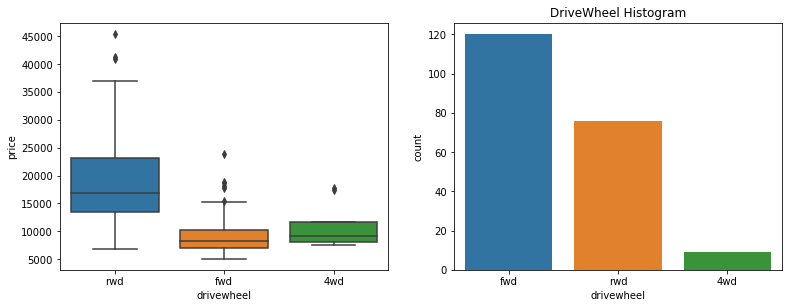

In [34]:
plt.subplot(2,3,1)
sns.boxplot(x = 'drivewheel', y = 'price', data = data)

plt.subplot(2,3,2)
plt.title('DriveWheel Histogram')
order = data['drivewheel'].value_counts(ascending=False).index
sns.countplot(x='drivewheel', data=data, order=order)

plt.show()

FWD is the most favored, followed by RWD , and 4WD is the least favored even though it is cheaper than RWD .

>>> Note: Existence of Outliers for several values.

Price VS symboling

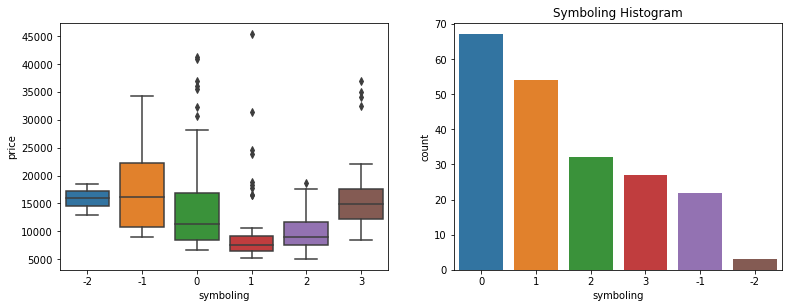

In [35]:
plt.subplot(2,3,1)
sns.boxplot(x=data.symboling, y=data.price)


plt.subplot(2,3,2)
plt.title('Symboling Histogram')
order = data['symboling'].value_counts(ascending=False).index
sns.countplot(x='symboling', data=data, order=order)

plt.show()

It seems that symboling 0 and 1 are the most favored.

Cars with symboling -1 and -2 are the most expensive, which is logical because it means that the car is more secure.

>>> Note: Existence of Outliers for several values.

## Data preparation

In [36]:
metadata_matrix_dataframe = get_meta_data(data)
list_potential_categorical_type(metadata_matrix_dataframe,data)

*********potential categorical data type columns*********


,Datatype,Variabel_Uniques_Count,Variabel_Uniques
index,,,
fuelsystem,object,8,"[mpfi, 2bbl, mfi, 1bbl, spfi, 4bbl, idi, spdi]"
enginetype,object,7,"[dohc, ohcv, ohc, l, rotor, ohcf, dohcv]"
cylindernumber,object,7,"[four, six, five, three, twelve, two, eight]"
symboling,int64,6,"[3, 1, 2, 0, -1, -2]"
carbody,object,5,"[convertible, hatchback, sedan, wagon, hardtop]"
drivewheel,object,3,"[rwd, fwd, 4wd]"
fueltype,object,2,"[gas, diesel]"
aspiration,object,2,"[std, turbo]"
doornumber,object,2,"[two, four]"


Remove the uncorrelated variables with Price, and choose only one variable among the variables correlated with it

In [37]:
data = data.drop(['carheight' ,'stroke' ,'compressionratio' ,'peakrpm' ,'carlength' ,'carwidth' ,'curbweight' ,'enginesize' ,'highwaympg'], axis=1)
data.head()

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,enginetype,cylindernumber,fuelsystem,boreratio,horsepower,citympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,dohc,four,mpfi,3.47,111,21,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,dohc,four,mpfi,3.47,111,21,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,ohcv,six,mpfi,2.68,154,19,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,ohc,four,mpfi,3.19,102,24,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,ohc,five,mpfi,3.19,115,18,17450.0


Dummy Variables creation

We can see that the values of these variables are in strings.

However, to fit a regression line, we would need numeric values instead of strings. Therefore, we must convert them to 1 and 0 using dummy variables.

We can do the following :

fueltype {" gas ": 1, " diesel ": 0}

suction {" std ": 1, " turbo ": 0}

doornumber {" two ": 1, " oven ": 0}

enginelocation {" front ": 1, " rear ": 0}

In [38]:
def binary_dummy_replace(x) :
     return x.map({"gas":1,"diesel":0,
                   "std":1,"turbo":0,
                   "two":1, "four":0,
                   "front": 1, "rear": 0})
def dummies(x,df):  
    temp = pd.get_dummies(df[x], prefix=x, drop_first = True)
    
    #l = temp.columns.values
    #for nm in l:
        #newt=x+"_"+nm
        #temp.rename({nm: Replace_Name(x)+"_"+nm}, axis=1, inplace=True)
        
    #print(temp.columns.values)
        
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

In [39]:
data = dummies('symboling',data)
data = dummies('CompanyName',data)
data = dummies('fueltype',data)
data = dummies('aspiration',data)
data = dummies('doornumber',data)
data = dummies('carbody',data)
data = dummies('drivewheel',data)
data = dummies('enginelocation',data)
data = dummies('enginetype',data)
data = dummies('cylindernumber',data)
data = dummies('fuelsystem',data)

In [40]:
data.head()

,wheelbase,boreratio,horsepower,citympg,price,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,CompanyName_audi,CompanyName_bmw,CompanyName_buick,CompanyName_chevrolet,CompanyName_dodge,CompanyName_honda,CompanyName_isuzu,CompanyName_jaguar,CompanyName_mazda,CompanyName_mercury,CompanyName_mitsubishi,CompanyName_nissan,CompanyName_peugeot,CompanyName_plymouth,CompanyName_porsche,CompanyName_renault,CompanyName_saab,CompanyName_subaru,CompanyName_toyota,CompanyName_volkswagen,CompanyName_volvo,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,3.47,111,21,13495.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,88.6,3.47,111,21,16500.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,94.5,2.68,154,19,16500.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,99.8,3.19,102,24,13950.0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,99.4,3.19,115,18,17450.0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


#### Preparation of Train and Test data

We will divide our dataset into 70 % for learning, and 30% for testing

In [41]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
cars_train, cars_test= train_test_split(data, train_size=0.67, test_size=0.33, random_state = 0)

Feature Scaling: Train Set & Test Set

In [42]:
from sklearn.preprocessing import StandardScaler,scale
#we create an object of the class StandardScaler
sc = StandardScaler() 

col_to_scale = ['wheelbase','boreratio','horsepower','citympg','price',]

cars_train[col_to_scale] = sc.fit_transform(cars_train[col_to_scale])
cars_test[col_to_scale] = sc.fit_transform(cars_test[col_to_scale])

cars_train.head()

,wheelbase,boreratio,horsepower,citympg,price,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,CompanyName_audi,CompanyName_bmw,CompanyName_buick,CompanyName_chevrolet,CompanyName_dodge,CompanyName_honda,CompanyName_isuzu,CompanyName_jaguar,CompanyName_mazda,CompanyName_mercury,CompanyName_mitsubishi,CompanyName_nissan,CompanyName_peugeot,CompanyName_plymouth,CompanyName_porsche,CompanyName_renault,CompanyName_saab,CompanyName_subaru,CompanyName_toyota,CompanyName_volkswagen,CompanyName_volvo,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
155,-0.534054,-1.097737,-1.103524,0.333598,-0.583062,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
97,-0.723234,-0.725116,-0.921031,1.008180,-0.680192,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
54,-0.943944,-0.985950,-0.947101,1.008180,-0.755502,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
184,-0.281814,-1.246785,-1.364229,2.020054,-0.680691,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
51,-0.943944,-1.172261,-0.947101,1.008180,-0.917592,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


Division into X_train and y_train sets for model construction

In [43]:
y_train = cars_train.loc[:,cars_train.columns == 'price']

X_train = cars_train.loc[:, cars_train.columns != 'price']

Division into X_test and y_test sets

In [44]:
y_test = cars_test.loc[:,cars_test.columns == 'price']

X_test = cars_test.loc[:, cars_test.columns != 'price']

### Prediction and Evaluation

1. Prediction

In [45]:
# Making predictions
import statsmodels.api as sm 

lm = sm.OLS(y_train,X_train).fit()

y_pred=lm.predict(X_test)

2. Evaluation

### Residual analysis of the model

In [46]:
resid = y_test - y_pred.to_frame('price')

2-A. Normality of the error distribution

At any time in our independent values X, the data points must be fairly close to the line, evenly distributed with only a few outliers.

A histogram of the residuals (errors) in our model can be used to check if they are normally distributed or not.

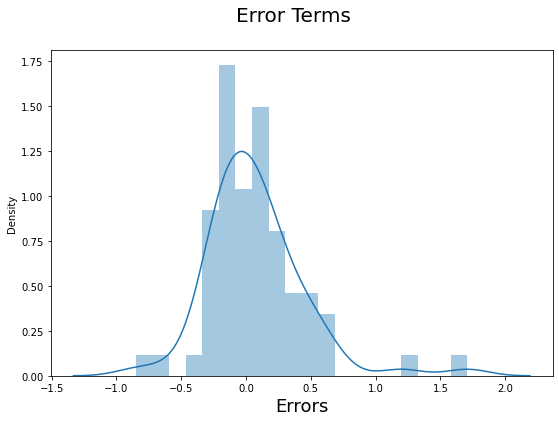

In [47]:
fig = plt.figure(figsize=(9,6))
sns.distplot(resid, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)
plt.show()

Analysis: The error terms are distributed around zero, which means that the prediction of the model is not random.

Another method to check, is to draw a graph of the predictions against the residualss, and see if the points are evenly distributed or not.

Text(0, 0.5, 'Residuals')

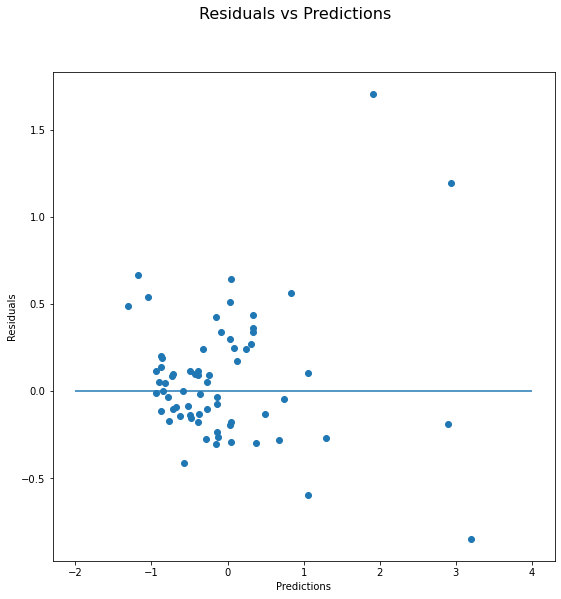

In [48]:
plt.figure(figsize=(9,9))
plt.scatter(y_pred, resid)
plt.hlines(0,-2,4)
plt.suptitle('Residuals vs Predictions', fontsize=16)
plt.xlabel('Predictions')
plt.ylabel('Residuals')

#### Anderson-Darling Test and Q-Q Plot of residuals

1. Q-Q Plot:
An arc-shaped deflection trace with respect to the diagonal implies that the residuals have an excessive asymmetry, meaning that the distribution is not symmetrical, with too many important residuals in one direction.

1. Anderson-Darling Test
Remains the most used by experts, to check the standard of errors.

It tests:

H0: Data follow normal distribution

H1: Data does not follow normal distribution

How to check H0?

A level of significance is chosen by us (5% in our case), which is associated with a critical value.

If the returned A-D statistic is greater than the critical value for the chosen significance level, then H0 must be rejected.

----Anderson-Darling test ---- 
statistic: 0.5530, critical value of 5%: 0.7660


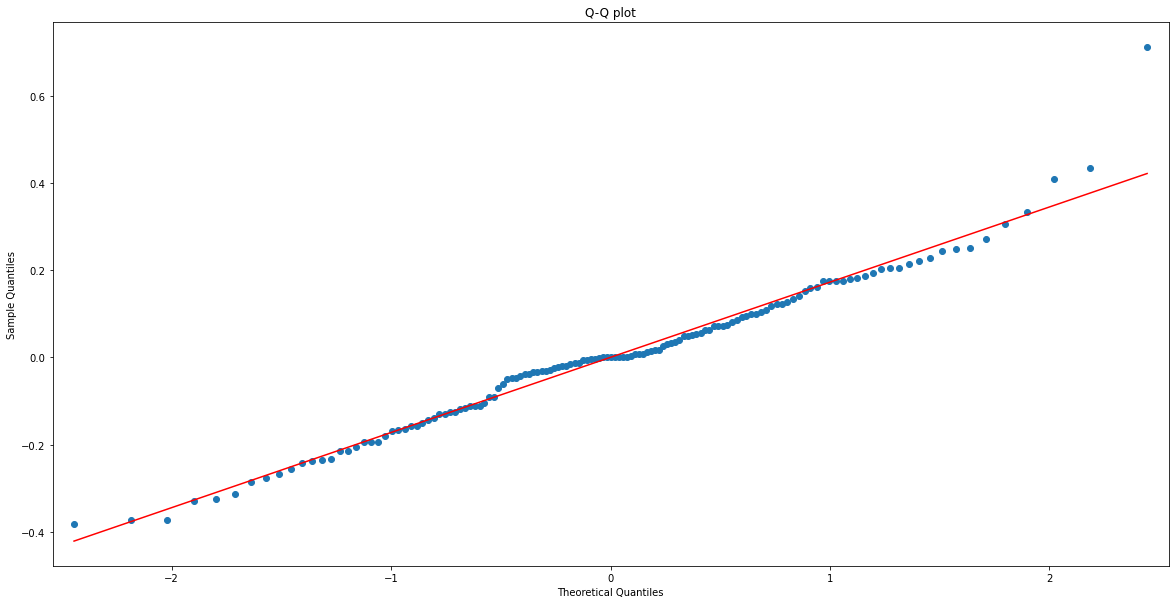

In [49]:
from scipy import stats

def normality_of_residuals_test(model):
    '''
    Function to establish the normal QQ graph of the residues and perform the Anderson-Darming statistical test to study the normality of the residuals.
    
    Arg:
    * model - OLS models adapted from statsmodels
    '''
    sm.ProbPlot(lm.resid).qqplot(line='s');
    plt.title('Q-Q plot');

    ad = stats.anderson(lm.resid, dist='norm')
    
    print(f'----Anderson-Darling test ---- \nstatistic: {ad.statistic:.4f}, critical value of 5%: {ad.critical_values[2]:.4f}')
    
normality_of_residuals_test(lm)

The trace does not have an arc shape.

the test accepts H0 that the data follow the normal distribution (stats < critical value of 5%)

#### 2-B. Independence of errors
This means that the residuals (i.e errors) should not be correlated.

1. Plot of residuals against their order.

What must alert us is the existence of a tendency, which tells us that the errors are in fact dependent.

Text(0, 0.5, 'Residuals')

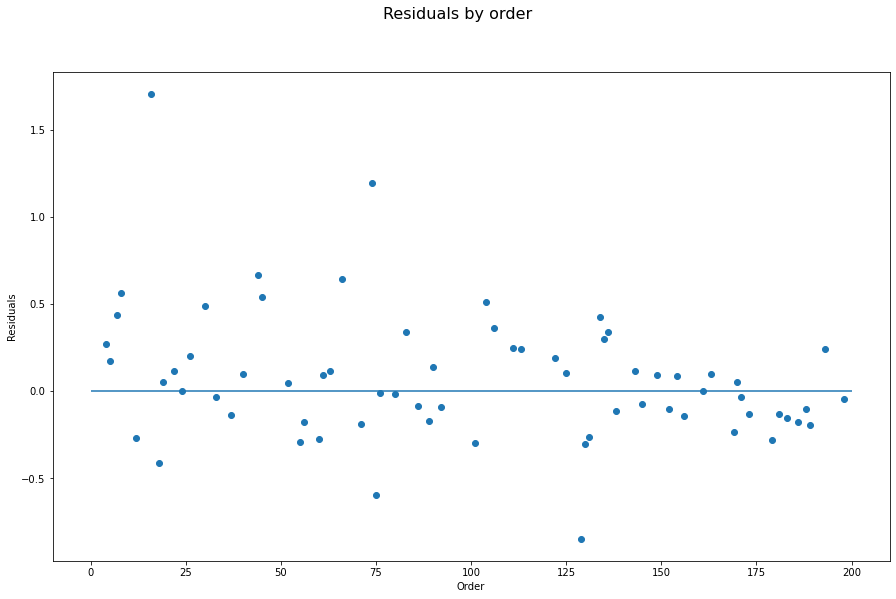

In [50]:
plt.figure(figsize=(15,9))
plt.scatter(resid.index, resid.values)
plt.hlines(0,0,200)
plt.suptitle('Residuals by order', fontsize=16)
plt.xlabel('Order')
plt.ylabel('Residuals')

As we see, the points are scattered randomly. no tendancy to be found.

Durbin_Watson Test
The test of Durbin-Watson tests the null hypothesis that the residuals are not dependent (autocorrelated) on each other.

The test returns a value d between 0 and 4.

A value d = 2: No autocorrelation detected in the sample.

A value d < 2: indicate a positive autocorrelation.

A d > 2 value: indicate a negative autocorrelation.

In general, values of d ~ 2 indicate that there is no dependence (no autocorrelation) between the residuals.

In [51]:
from statsmodels.stats.stattools import durbin_watson

In [52]:
print(durbin_watson(resid))

[1.81015293]


1. ACF - Auto-Correlation Function plots
We want to see if the value of ACF is significant for each bar.

By calling the function, we indicate the level of significance that interests us (alpha = 0.05 in our case) and the critical zone is drawn on the graph (In blue).

Significant correlations lie outside this area.

>>> Note: First bar is always at 1.

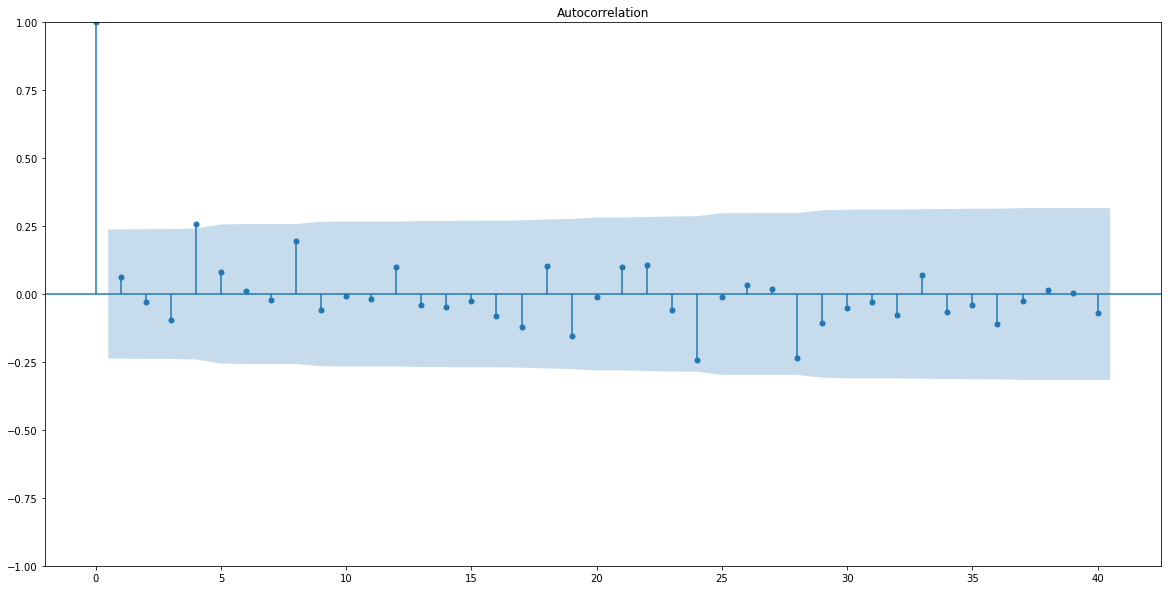

In [53]:
import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(resid, lags=40 , alpha=0.05)
acf.show()

We see that all the bars are inside the blue zone, except one, which is acceptable since Durbin_Watson returned a value very close to 2.

#### 2-C. Homoscedasticity

This assumption indicates that the variance of the residuals must be similar for the values of the independent variables.

We can verify this by plotting the residuals against the predicted values.

To identify homo-dedasticity in the graph, the location of the points should be random and no trend should be visible, and the red regression line in the graph should be as flat as possible (not of an arch form).

Goldfeld-Quandt test:

He tests:

1. Null hypothesis H0: the error terms are homoscedastic
2. Alternative Hypothesis H1: The error terms are heteroscedastic.
Recall:

If P-value <= 0.05 ==> We reject the null hypothesis H0

If P-Value> 0.05 ==> The null hypothesis H0 is true


----Goldfeld-Quandt test ----
[('F statistic', 1.8786403206327882), ('p-value', 0.07034410207973085)]

----Residuals plots ----


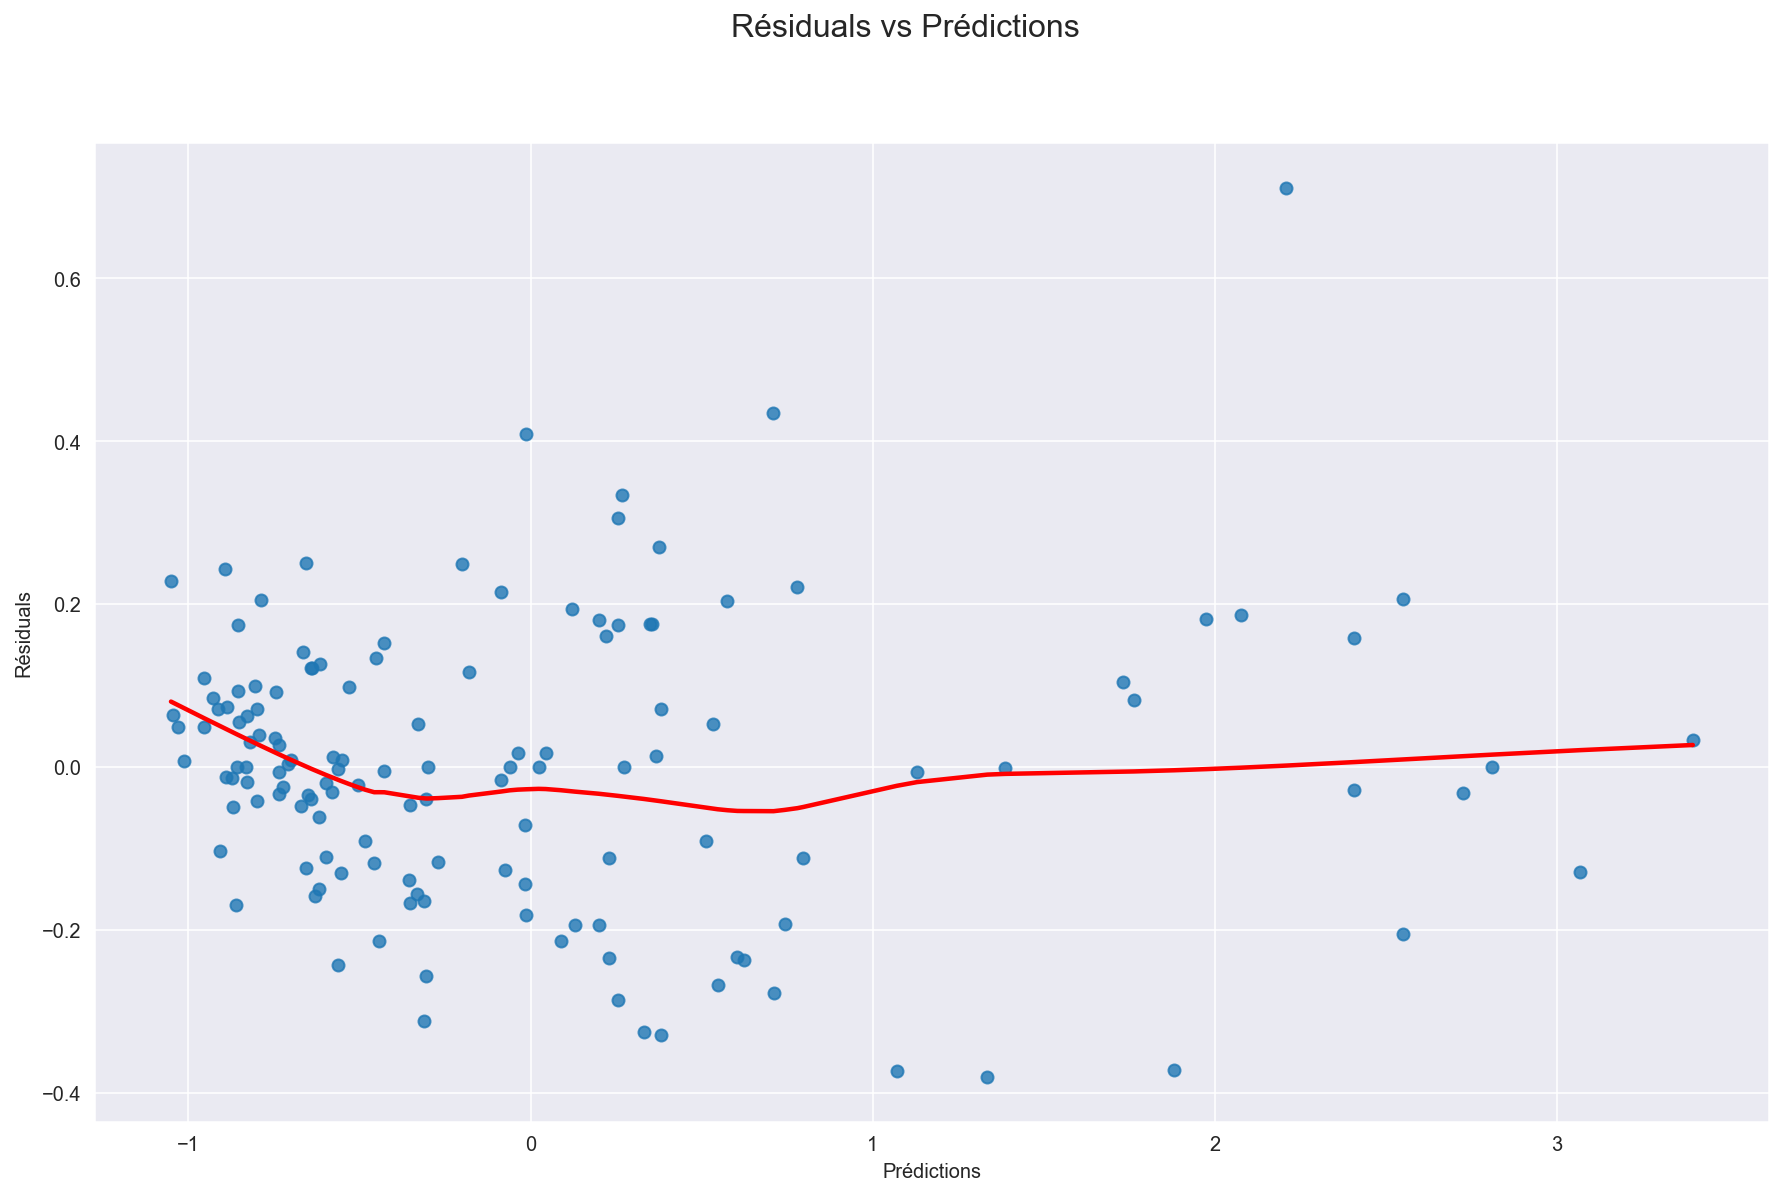

In [54]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def homoscedasticity_test(model):
    '''
    Test function for the homoscedasticity of residuals in a linear regression model.

    It compares residual values ​​to predicted values ​​and performs Goldfeld-Quandt tests.
    
    Args:
    * model - fitted OLS model from statsmodels
    '''
    fitted_vals = model.predict()
    resids = model.resid

    #fit_reg=False
    sns.regplot(x=fitted_vals, y=resids, lowess=True, line_kws={'color': 'red'})
    plt.suptitle('Résiduals vs Prédictions', fontsize=16)
    plt.xlabel('Prédictions')
    plt.ylabel('Résiduals')

    print('\n----Goldfeld-Quandt test ----')
    name = ['F statistic', 'p-value']
    test = sms.het_goldfeldquandt(lm.resid, lm.model.exog)
    print(lzip(name, test))
    print('\n----Residuals plots ----')

homoscedasticity_test(lm)

Analysis:

P-Value test Goldfeld-Quandt > 0.05, so we accept H0 saying that the error terms are homoscedastic, which means that the residuals have a constant variance.

Also, in the plot, the points are scattered randomly, no tendancy to be found, and the line doesn't have the form of an arch

all the hypotheses are verified

#### Evaluation of the test via the comparison of y_pred and y_test

What we are looking for is that the errors should be as close as possible to the line, wich is the case in the plot below

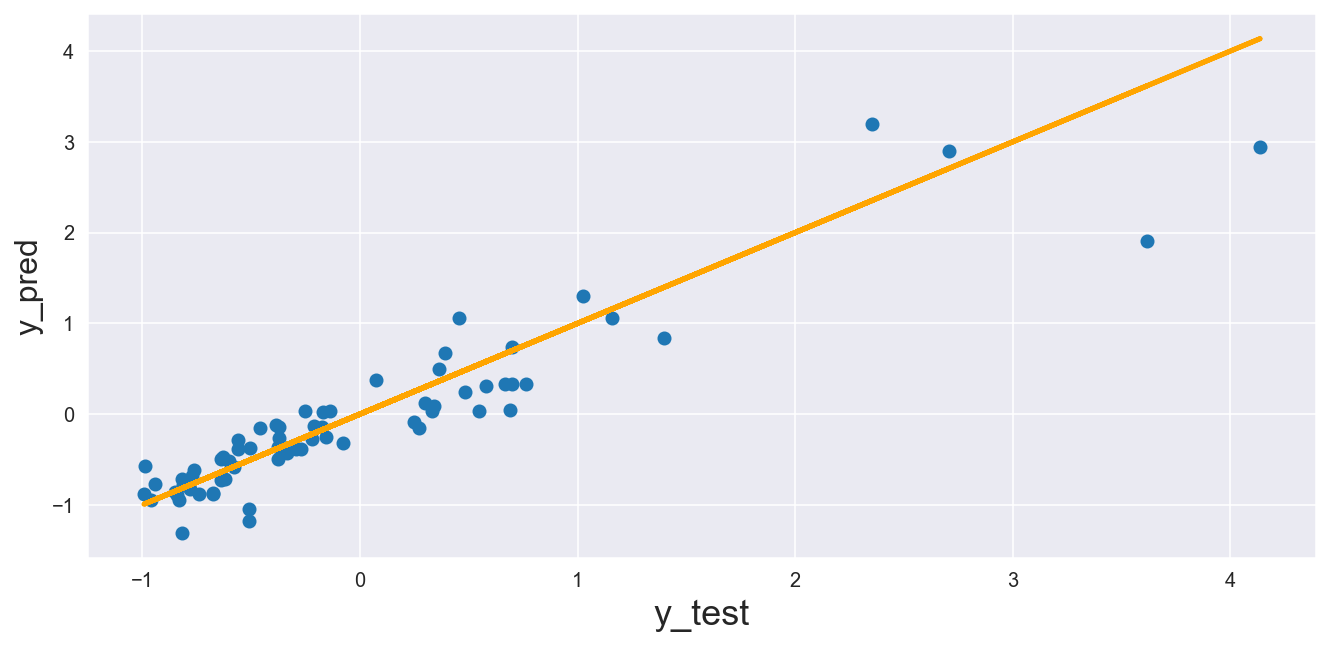

In [55]:
fig = plt.figure(figsize=(11,5))
plt.scatter(y_test,y_pred)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)

#Regression Line function
f = lambda x: x

# x values of line to plot
x = np.array(y_test)

# plot fit
plt.plot(x,f(x),lw=2.5, c="orange")

### Summary

Coefficient of determination R²:

Recall:

If R² = 0: the dependent variable Y can not be predicted from the independent variable X

If R² = 1: the dependent variable Y can be predicted from the independent variable X

If 0 <R² <1: Indicates the percentage at which the dependent variable Y is predictable by X

In [56]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.8558800905758744

In [57]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     56.21
Date:                Thu, 01 Jun 2023   Prob (F-statistic):           1.01e-48
Time:                        19:34:31   Log-Likelihood:                 46.514
No. Observations:                 137   AIC:                             8.971
Df Residuals:                      86   BIC:                             157.9
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
wheelbase                  0

59 variables used to have R²> 0.8, which is too much.

P-values of some variables appear to be greater than 0.05, meaning they are statistically insignificant.

==== The 2nd warning says: ===

 The smallest eigenvalue is 2.4e-30. This may indicate that there are strong problems of multicollinearity or
 that the design matrix is singular.

Violation of hypothesis of multicollinearity. There are correlated variables between them which should not exist

Can we do better?

Yes, by using RFE

### RFE
In the section of Exploring Data, we have identified the relevant independent variables that are correlated with the independent variable Price, and which are not correlated with each other (ie no multi-collinearity), and we said that we need to keep them, and igon the rest.

To do that, we will use a mixed approach to find the relevant features:

 1.Identify these variables using RFE (Recursive Feature Elimination)

 2.Manual approach to find the right fit
The use of RFE gives us an automated way to select important attributes that can influence the dependent variable (i.e Price).

We will use a mixed approach here and initially, we will simply use the functionalities returned by RFE as a starting model.

In [58]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [59]:
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [60]:
rfe = RFE(regression,n_features_to_select=10)
rfe = rfe.fit(X_train,y_train)

Extract important variables

The RFE() method returns a "support_" array of variables considered important:

If support_ == True: Important variable

If support_ == False: Not important variable

In [61]:
for z in range(len(X_train.columns)):
    print(X_train.columns[z],'\t\t\t',rfe.support_[z])

wheelbase 			 False
boreratio 			 False
horsepower 			 True
citympg 			 False
symboling_-1 			 False
symboling_0 			 False
symboling_1 			 False
symboling_2 			 False
symboling_3 			 False
CompanyName_audi 			 False
CompanyName_bmw 			 True
CompanyName_buick 			 True
CompanyName_chevrolet 			 False
CompanyName_dodge 			 False
CompanyName_honda 			 False
CompanyName_isuzu 			 False
CompanyName_jaguar 			 True
CompanyName_mazda 			 False
CompanyName_mercury 			 False
CompanyName_mitsubishi 			 False
CompanyName_nissan 			 False
CompanyName_peugeot 			 False
CompanyName_plymouth 			 False
CompanyName_porsche 			 True
CompanyName_renault 			 False
CompanyName_saab 			 False
CompanyName_subaru 			 False
CompanyName_toyota 			 False
CompanyName_volkswagen 			 False
CompanyName_volvo 			 False
fueltype_gas 			 False
aspiration_turbo 			 False
doornumber_two 			 False
carbody_hardtop 			 True
carbody_hatchback 			 True
carbody_sedan 			 True
carbody_wagon 			 True
drivewheel_fwd 			 False
driv

The columns selected by RFE

In [62]:
col = X_train.columns[rfe.support_]
for x in col:
    print(x)

horsepower
CompanyName_bmw
CompanyName_buick
CompanyName_jaguar
CompanyName_porsche
carbody_hardtop
carbody_hatchback
carbody_sedan
carbody_wagon
enginelocation_rear


In [63]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,horsepower,CompanyName_bmw,CompanyName_buick,CompanyName_jaguar,CompanyName_porsche,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginelocation_rear
155,-1.103524,0,0,0,0,0,0,0,1,0
97,-0.921031,0,0,0,0,0,0,0,1,0
54,-0.947101,0,0,0,0,0,0,1,0,0
184,-1.364229,0,0,0,0,0,0,1,0,0
51,-0.947101,0,0,0,0,0,1,0,0,0


In [64]:
import statsmodels.api as sm 

def color_code_vif_values(val):
    """
    Take a scalar and return a string with the property css 'color: red' for 10, black otherwise.
    """
    if val > 10 : color = 'red' 
    elif val > 5 and val <= 10 : color = 'blue'
    elif val > 0 and val <= 5 : color = 'darkgreen'
    else : color = 'black'
    return 'color: %s' % color

def drop_col(dataframe,col_to_drop) :
    dataframe.drop([col_to_drop],axis=1,inplace=True)
    return dataframe

def display_vif(x) :
    #Calculer les VIFs pour le nouveau modèle
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    vif = pd.DataFrame()
    X = x
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.set_index("Features")
    vif = vif.sort_values(by = "VIF", ascending = False)
    df = pd.DataFrame(vif.VIF).style.applymap(color_code_vif_values)
    display(df)
    
model_count = 0

def statsmodel_summary(y_var,x_var) :
    global model_count
    model_count = model_count + 1
    text = "*****MODEL - " + str(model_count)
    print(text)
    
    x_var_const = sm.add_constant(x_var) # adding constant
    lm = sm.OLS(y_var,x_var_const).fit() # calculating the fit
    print(lm.summary()) # print summary for analysis
    display_vif(x_var_const.drop(['const'],axis=1))
    return x_var_const , lm

### I. Check the multicollinearity between the variables selected by RFE

To do that, we base ourselves on 2 things:

#### 1.P-Value:

P-Value <= **0.05** means that this particular independent variable greatly improves the fit of the model

P-value > **0.05** no improvement

##### 2.VIF (Variance Inflation Factor):

VIF > **5**, there is an indication that multicollinearity may be present, but not enough to worry.

VIF > **10**, there is certainly a multicollinearity among the variables.

In [65]:
lm = statsmodel_summary(y_train,X_train_rfe)

*****MODEL - 1
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     116.6
Date:                Thu, 01 Jun 2023   Prob (F-statistic):           5.55e-57
Time:                        19:34:32   Log-Likelihood:                -41.929
No. Observations:                 137   AIC:                             103.9
Df Residuals:                     127   BIC:                             133.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const              

,VIF
Features,
CompanyName_porsche,inf
enginelocation_rear,inf
horsepower,1.710000
CompanyName_jaguar,1.360000
carbody_hardtop,1.340000
carbody_sedan,1.240000
CompanyName_bmw,1.190000
CompanyName_buick,1.170000
carbody_wagon,1.030000


P-value analysis: P-value of carbody_sedan > 0.05. We must delete it.

In [66]:
X_train_rfe = X_train_rfe.drop(["carbody_sedan"], axis = 1)
X_train_rfe.head()

,horsepower,CompanyName_bmw,CompanyName_buick,CompanyName_jaguar,CompanyName_porsche,carbody_hardtop,carbody_hatchback,carbody_wagon,enginelocation_rear
155,-1.103524,0,0,0,0,0,0,1,0
97,-0.921031,0,0,0,0,0,0,1,0
54,-0.947101,0,0,0,0,0,0,0,0
184,-1.364229,0,0,0,0,0,0,0,0
51,-0.947101,0,0,0,0,0,1,0,0


In [67]:
lm = statsmodel_summary(y_train,X_train_rfe)

*****MODEL - 2
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     130.2
Date:                Thu, 01 Jun 2023   Prob (F-statistic):           1.11e-57
Time:                        19:34:32   Log-Likelihood:                -42.861
No. Observations:                 137   AIC:                             103.7
Df Residuals:                     128   BIC:                             130.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const              

,VIF
Features,
CompanyName_porsche,inf
enginelocation_rear,inf
horsepower,1.650000
carbody_hardtop,1.340000
CompanyName_jaguar,1.250000
CompanyName_buick,1.110000
CompanyName_bmw,1.050000
carbody_wagon,1.030000
carbody_hatchback,1.020000


P-value analysis: P-value of carbody_wagon > 0.05. We must delete it.

In [68]:
X_train_rfe = X_train_rfe.drop(["carbody_wagon"], axis = 1)
X_train_rfe.head()

,horsepower,CompanyName_bmw,CompanyName_buick,CompanyName_jaguar,CompanyName_porsche,carbody_hardtop,carbody_hatchback,enginelocation_rear
155,-1.103524,0,0,0,0,0,0,0
97,-0.921031,0,0,0,0,0,0,0
54,-0.947101,0,0,0,0,0,0,0
184,-1.364229,0,0,0,0,0,0,0
51,-0.947101,0,0,0,0,0,1,0


In [69]:
lm = statsmodel_summary(y_train,X_train_rfe)

*****MODEL - 3
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     148.6
Date:                Thu, 01 Jun 2023   Prob (F-statistic):           1.43e-58
Time:                        19:34:32   Log-Likelihood:                -43.391
No. Observations:                 137   AIC:                             102.8
Df Residuals:                     129   BIC:                             126.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const              

,VIF
Features,
CompanyName_porsche,inf
enginelocation_rear,inf
horsepower,1.620000
carbody_hardtop,1.340000
CompanyName_jaguar,1.240000
CompanyName_buick,1.100000
CompanyName_bmw,1.040000
carbody_hatchback,1.020000


Next step: Delete CompanyName_porsche because VIF> 10

In [70]:
X_train_rfe = X_train_rfe.drop(["CompanyName_porsche"], axis = 1)
X_train_rfe.head()

,horsepower,CompanyName_bmw,CompanyName_buick,CompanyName_jaguar,carbody_hardtop,carbody_hatchback,enginelocation_rear
155,-1.103524,0,0,0,0,0,0
97,-0.921031,0,0,0,0,0,0
54,-0.947101,0,0,0,0,0,0
184,-1.364229,0,0,0,0,0,0
51,-0.947101,0,0,0,0,1,0


In [71]:
lm = statsmodel_summary(y_train,X_train_rfe)

*****MODEL - 4
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     148.6
Date:                Thu, 01 Jun 2023   Prob (F-statistic):           1.43e-58
Time:                        19:34:32   Log-Likelihood:                -43.391
No. Observations:                 137   AIC:                             102.8
Df Residuals:                     129   BIC:                             126.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const              

,VIF
Features,
horsepower,1.620000
enginelocation_rear,1.570000
carbody_hardtop,1.340000
CompanyName_jaguar,1.240000
CompanyName_buick,1.100000
CompanyName_bmw,1.040000
carbody_hatchback,1.020000


All P-Values are less than 0.05, and all VIF values are less than 5.

Turning now to the prediction and evaluation of our model

## Prediction and Evaluation
1. Prédiction

Creation of X_test_new by keeping only the relevant variables found by RFE.

In [72]:
#Array containing names of important variables
final_features = list(X_train_rfe.columns)

#Filter the test dataset
X_test_new = X_test.filter(final_features)

X_test_new.head()

,horsepower,CompanyName_bmw,CompanyName_buick,CompanyName_jaguar,carbody_hardtop,carbody_hatchback,enginelocation_rear
52,-0.858916,0,0,0,0,1,0
181,1.258823,0,0,0,0,0,0
5,0.151823,0,0,0,0,0,0
18,-1.340220,0,0,0,0,1,0
188,-0.088829,0,0,0,0,0,0


In [73]:
# Making predictions
lm = sm.OLS(y_train,X_train_rfe).fit()

y_pred=lm.predict(X_test_new)

2. Evaluation

In [74]:
resid = y_test - y_pred.to_frame('price')

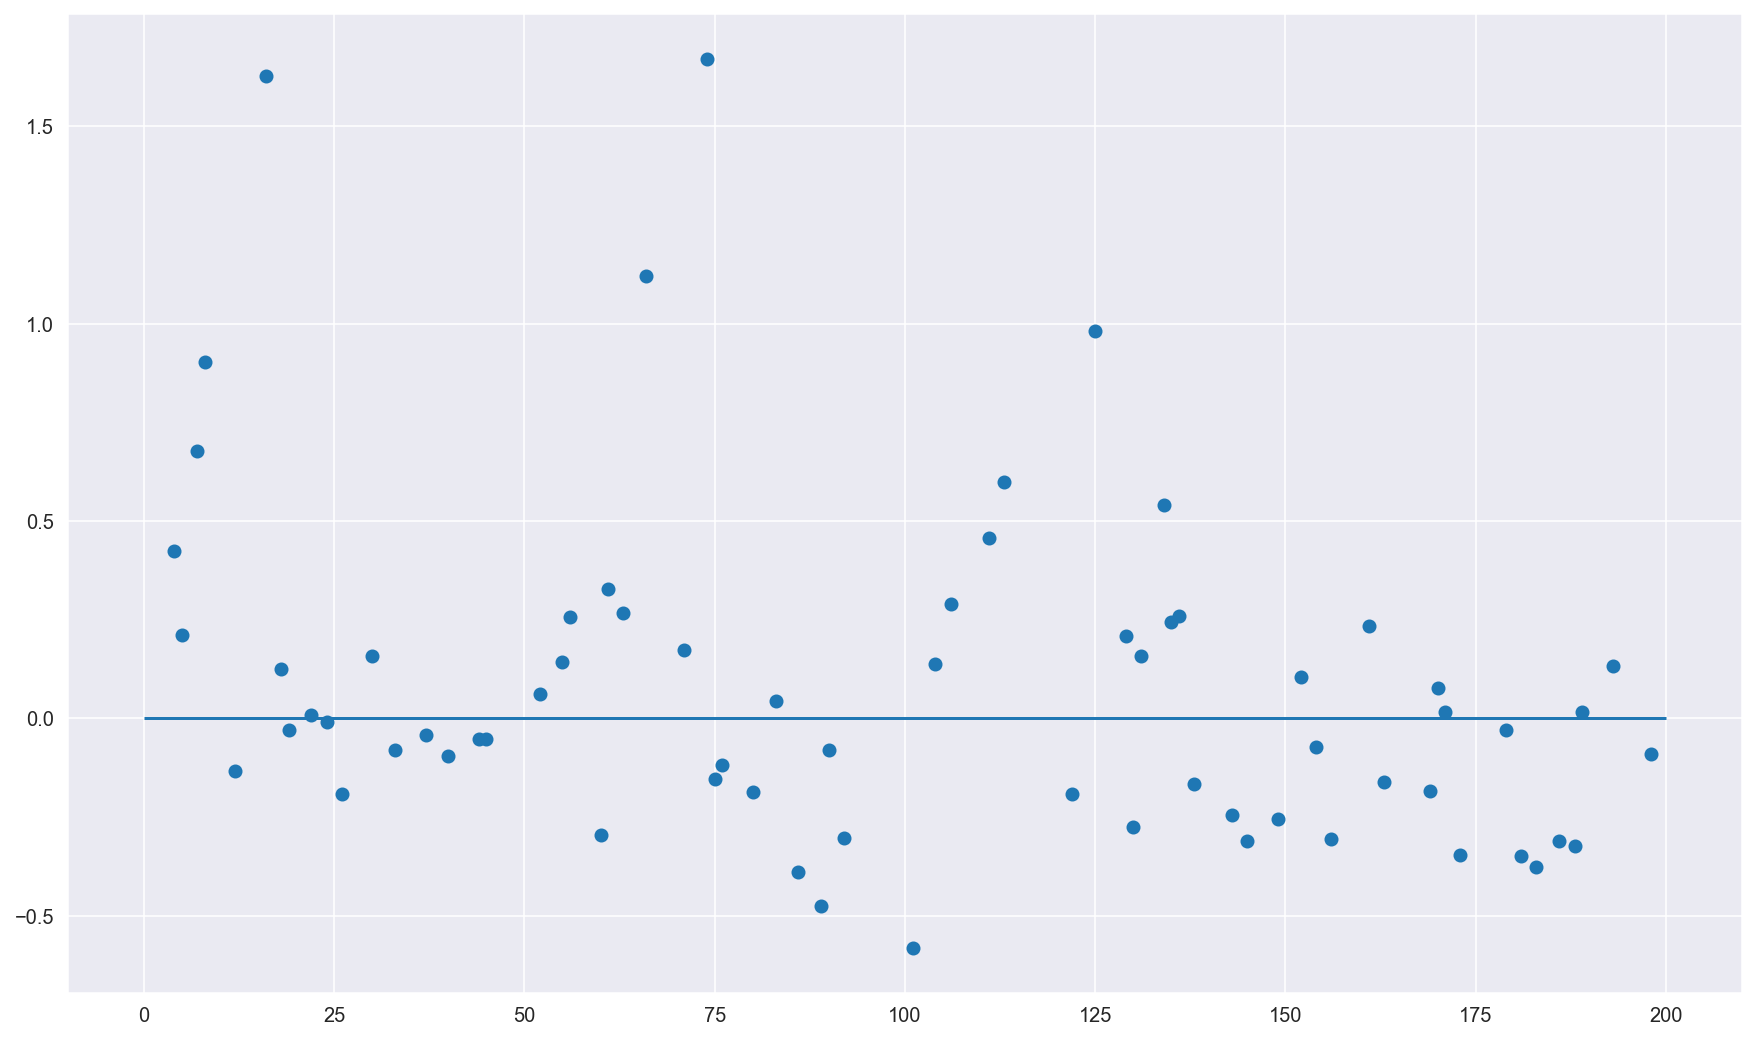

In [75]:
plt.figure(figsize=(15,9))
plt.scatter(resid.index, resid.values)
plt.hlines(0,0,200)

As we see, the points are scattered at random. no trend.

### 2. Durbin_Watson Test

In [76]:
print(durbin_watson(resid))

[2.16365654]


### 3. ACF - Auto-Correlation Function plots

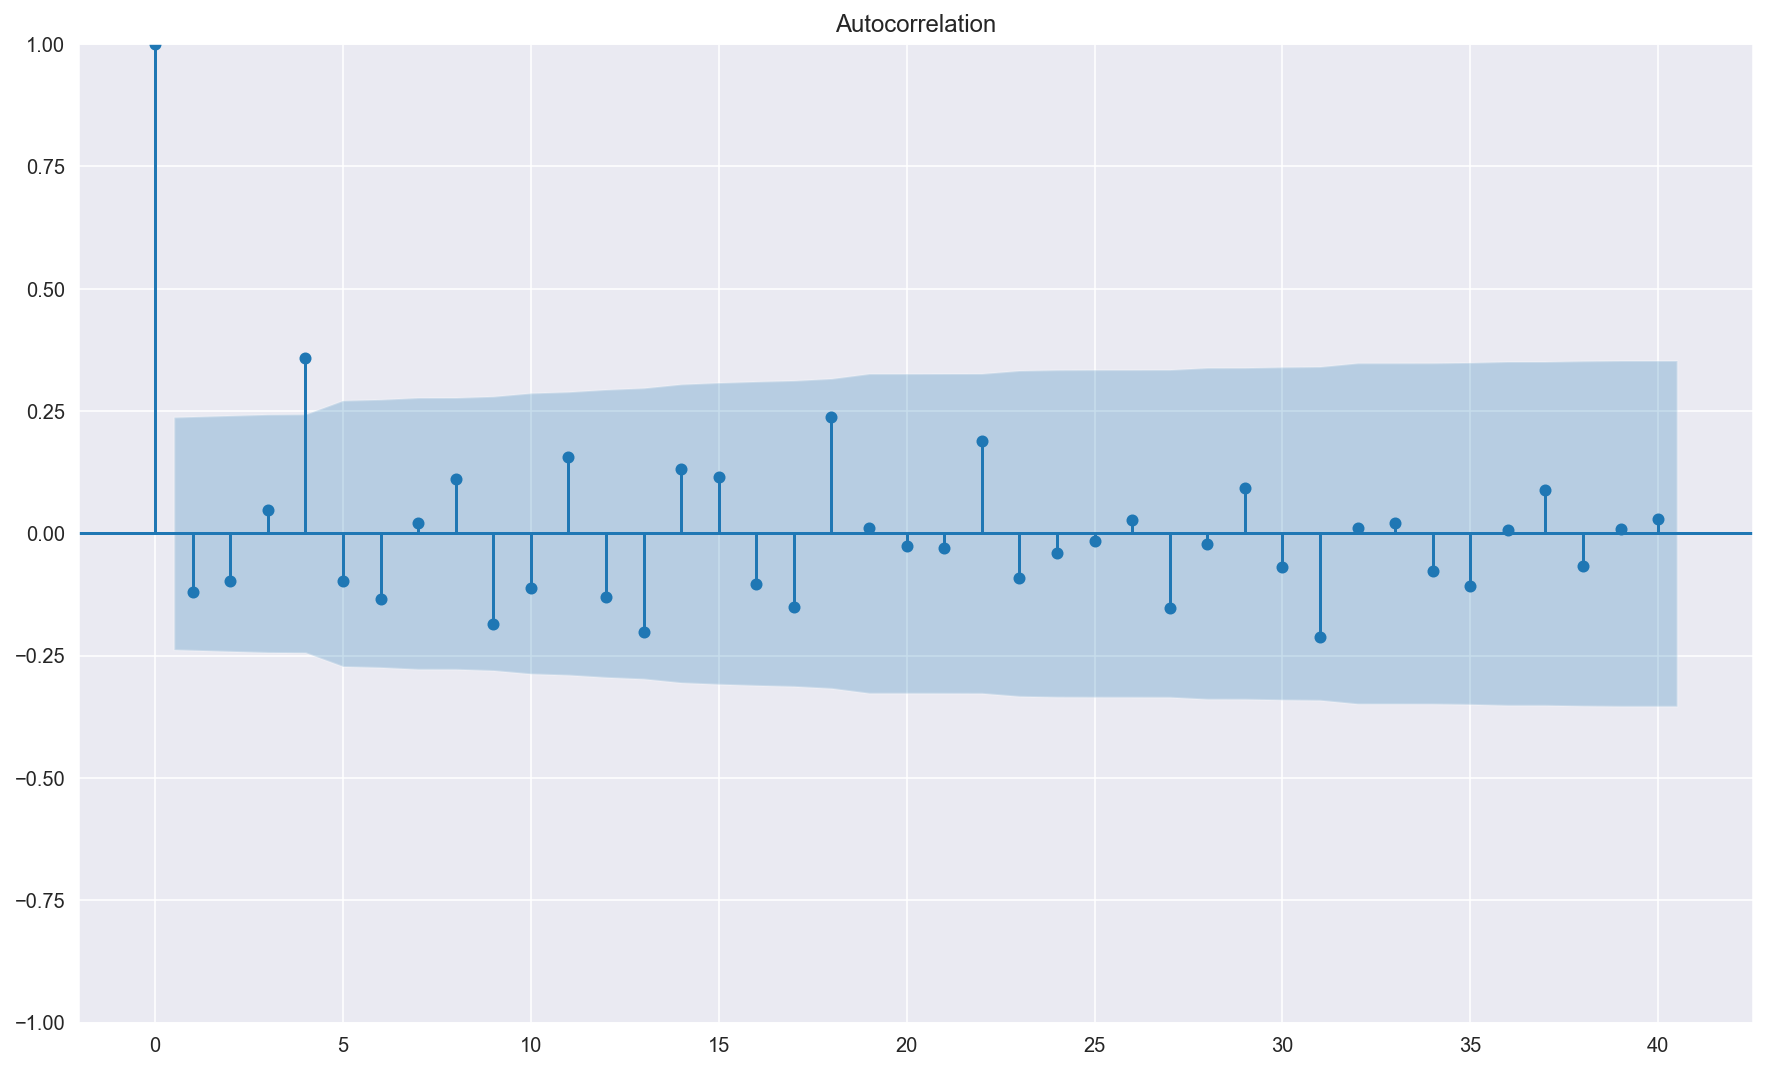

In [77]:
import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(resid, lags=40 , alpha=0.05)
acf.show()

We see that all the bars are inside the blue zone, except one, which is acceptable since Durbin_Watson has returned a value very close to 2.0

### 2-B. Homoscedasticity


----Goldfeld-Quandt test ----
[('F statistic', 1.204857209653521), ('p-value', 0.23327503414510573)]

----Residuals plots ----


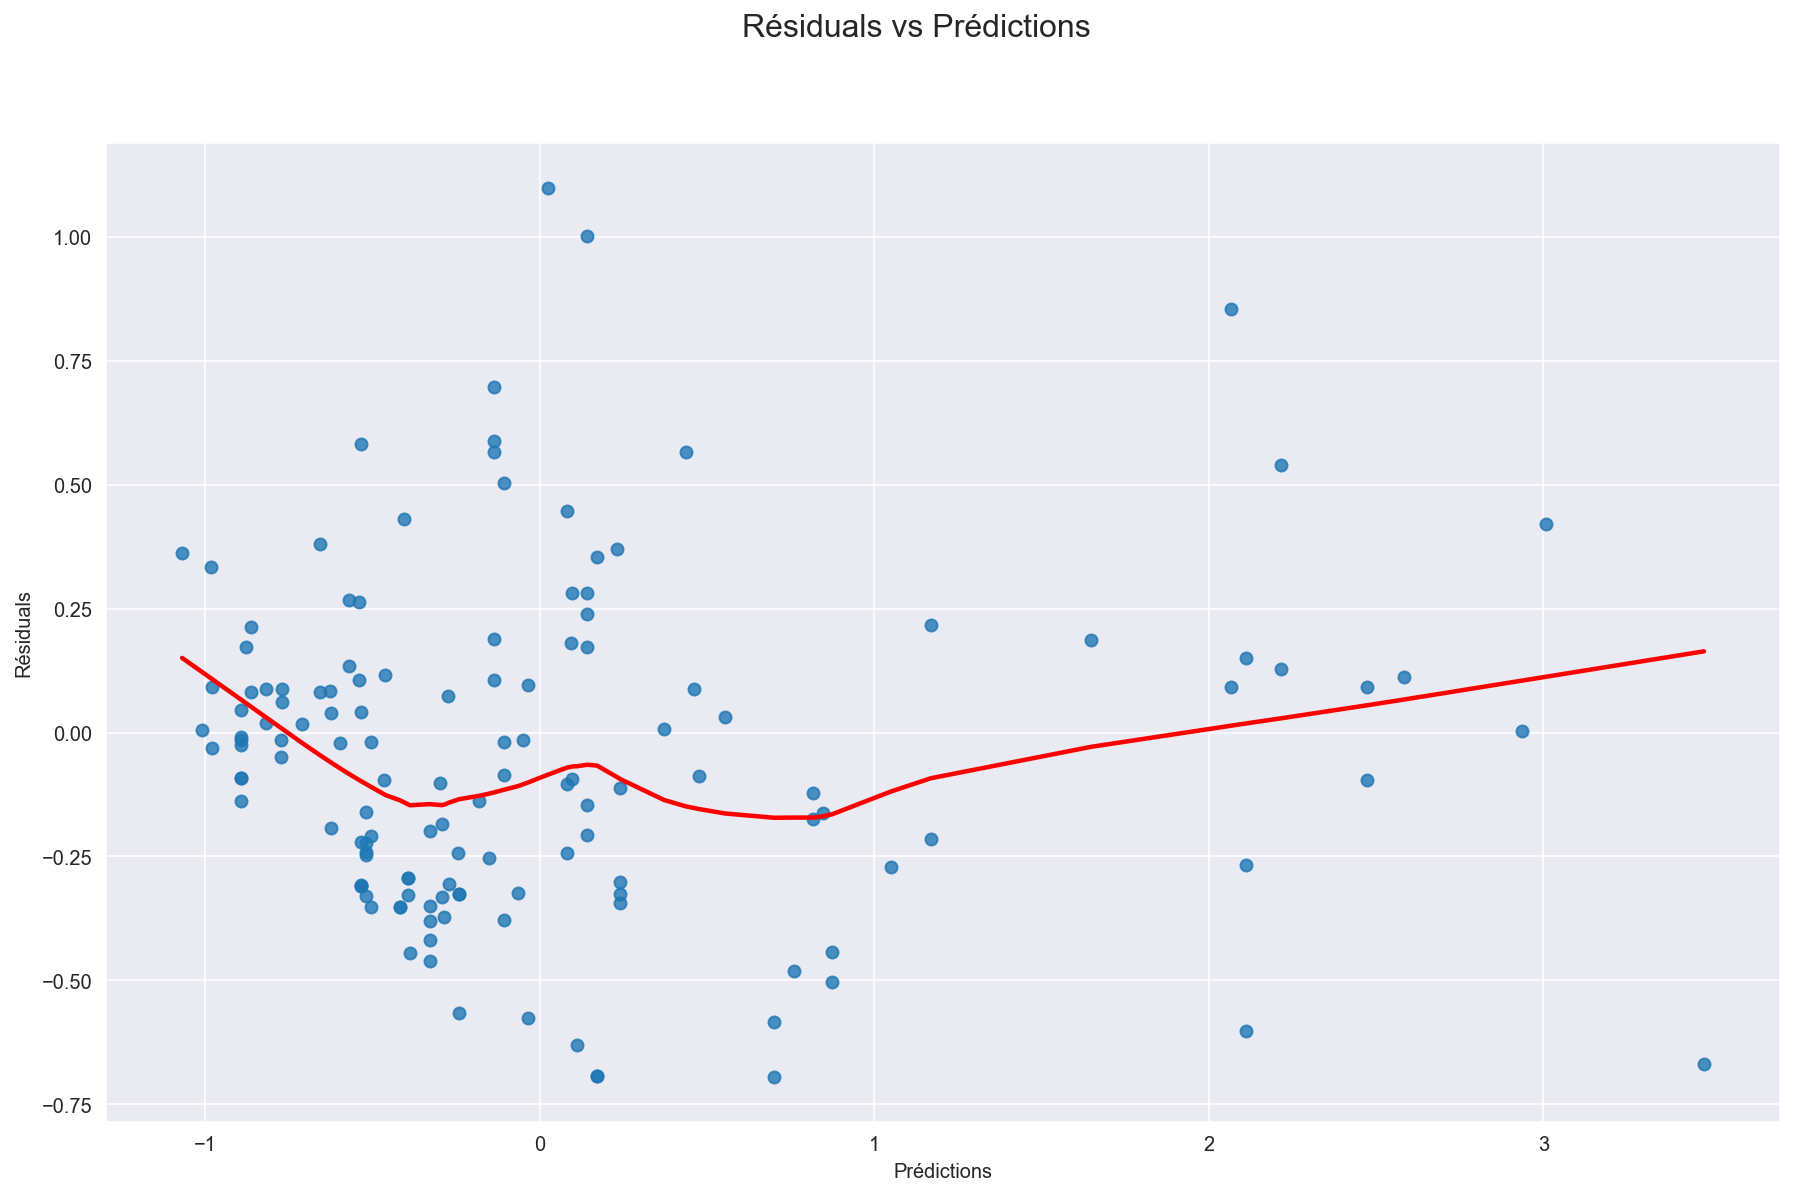

In [78]:
homoscedasticity_test(lm)

Analysis:

P-Value of Goldfeld-Quandt Test > 0.05, so we accept H0 saying that the error terms are homoscedastic, which means that the residuals have a constant variance.

Also, in the plot, the points are scattered randomly, no tendancy to be found, and the line doesn't have the form of an arc

### 2-C. Normality of the error distribution

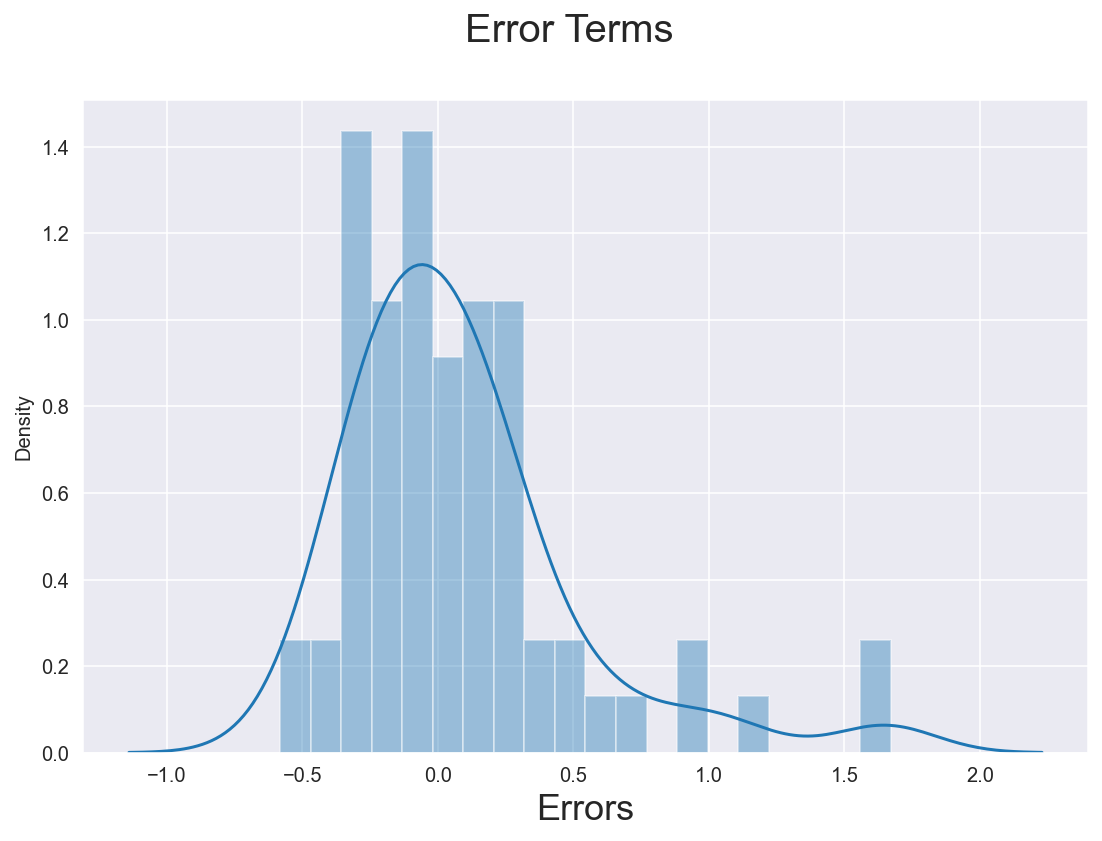

In [79]:
fig = plt.figure(figsize=(9,6))
sns.distplot(resid, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)
plt.show()

Analysis: The error terms are a little bit asymmetric.

#### Anderson-Darling Test and Q-Q Plot

----Anderson-Darling test ---- 
statistic: 0.8113, critical value of 5%: 0.7660


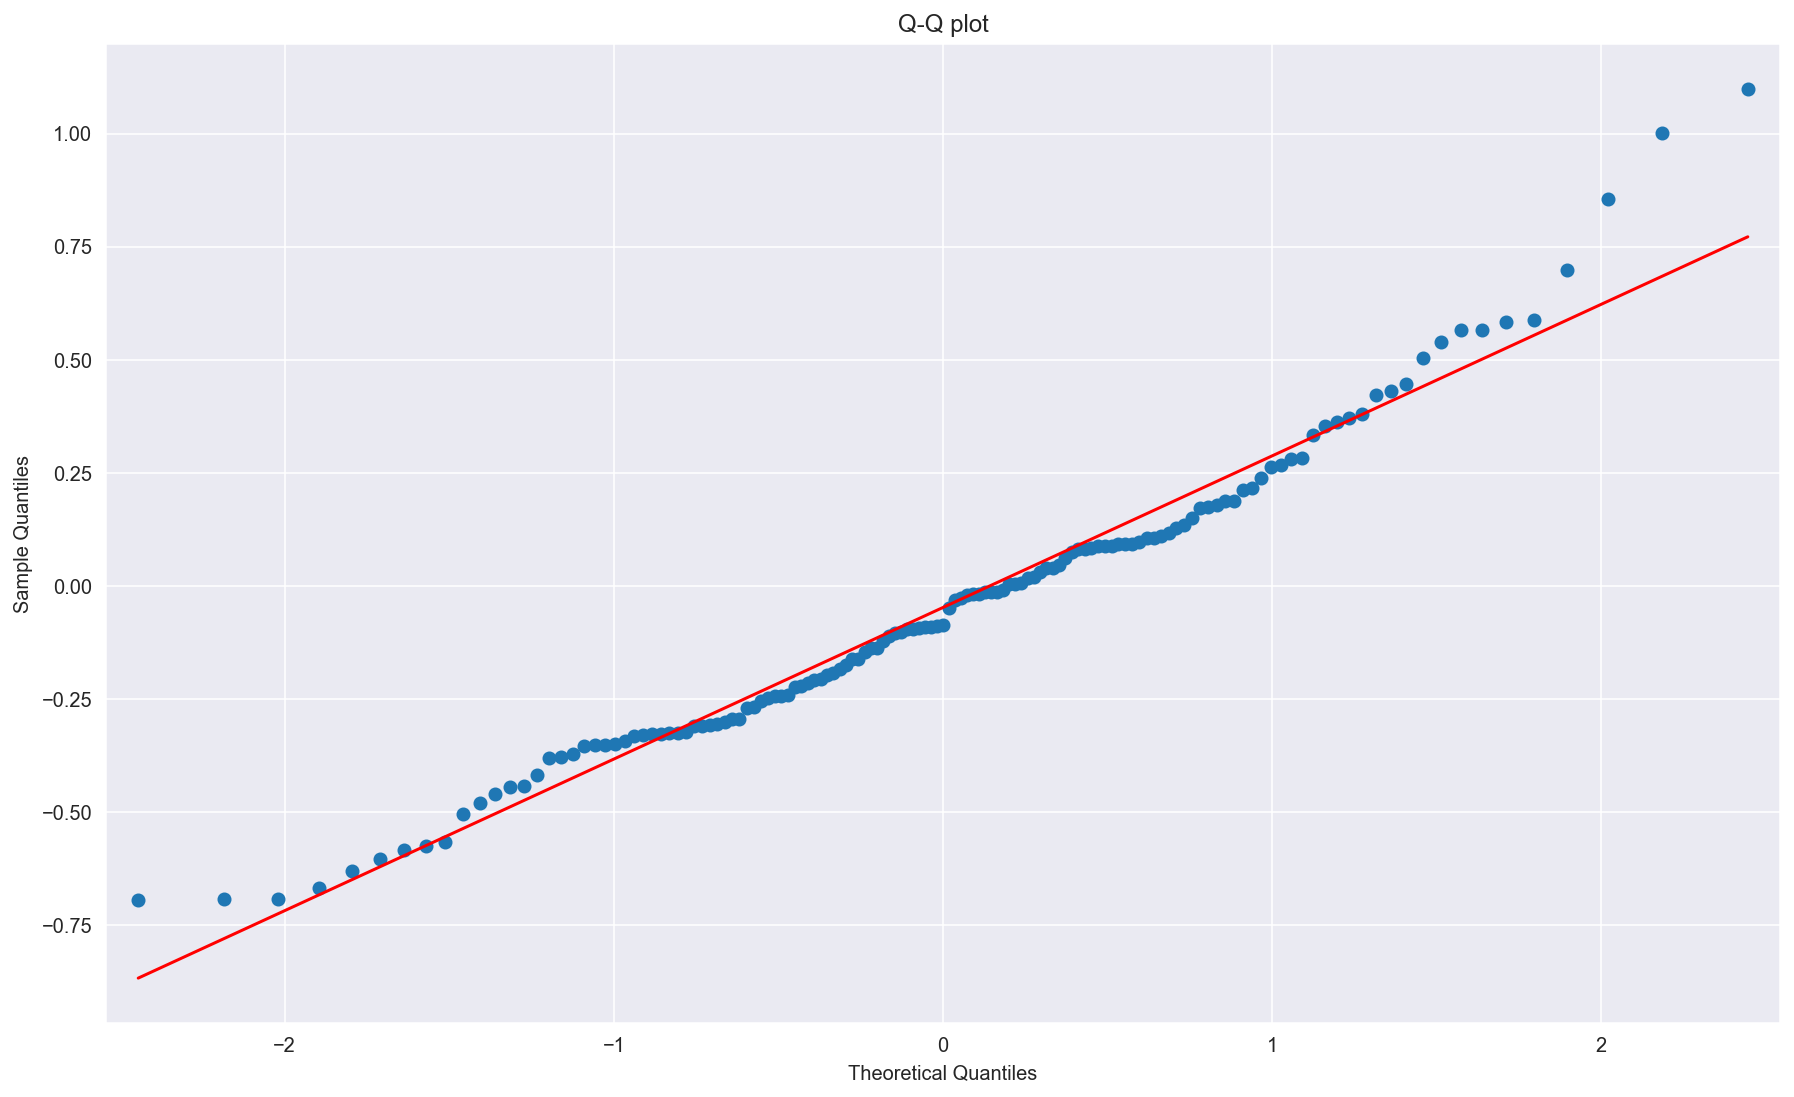

In [80]:
normality_of_residuals_test(lm)

The blue trace slightly take form of an arc, but not aggressively

the test rejects H0 that the data follow a normal distribution (stats > critical value of 5%)

Evaluation of the test via the comparison of y_pred and y_test

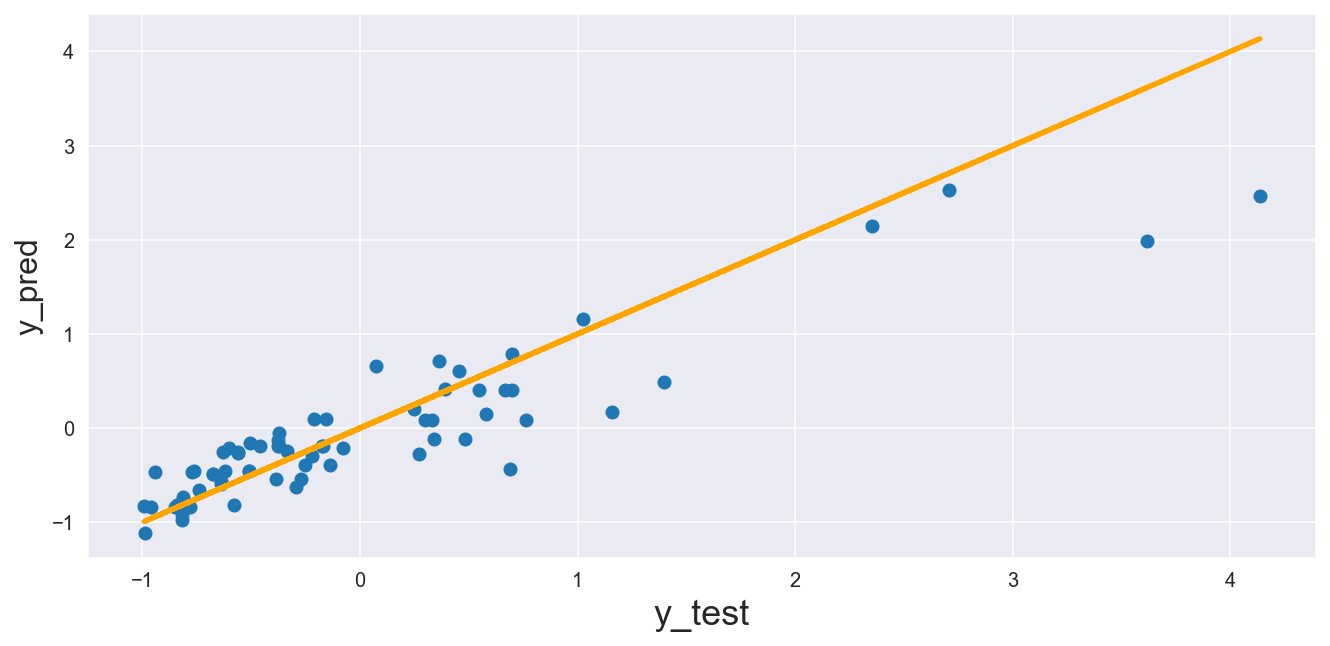

In [81]:
fig = plt.figure(figsize=(11,5))
plt.scatter(y_test,y_pred)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)

#Regression Line function
f = lambda x: x

# x values of line to plot
x = np.array(y_test)

# plot fit
plt.plot(x,f(x),lw=2.5, c="orange")

### Final summary of the model

In [82]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.8099546681056491

What has changed with RFE?

1.R² decreased by 0.05 and remains above 0.8 which is good.

2.The value of the Durbin-watson test has increased, indicating more independence of errors.

3.The value of the Golden-Quandt test has increased sharply from 0.070 to 0.130, and the red line remains flat. (Much better homo-scedasticity)

4.No multicollinearity.

But, we see that the hypothesis of normality of errors is violated.

Actual data rarely includes normally distributed errors, and it may not be possible to adapt your data to a model whose errors do not violate the normality assumption.

It is usually best to focus on violations of other assumptions and / or on the influence of some Outliers (who may in any case be responsible for violations of normality).

So, if I have the choice between, violating the hypothesis of multicollinearity or the hypothesis of normality of the errors. I will choose normality because it is the least sensitive hypothesis among the others.

In [83]:
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.885
Model:                            OLS   Adj. R-squared (uncentered):              0.879
Method:                 Least Squares   F-statistic:                              143.4
Date:                Thu, 01 Jun 2023   Prob (F-statistic):                    5.91e-58
Time:                        19:34:34   Log-Likelihood:                         -46.039
No. Observations:                 137   AIC:                                      106.1
Df Residuals:                     130   BIC:                                      126.5
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

All the P-Values are under 0.05. Also, the Previous Alert that we had about existence of Multi-colinearity is not there any more

### Reduction of dimension

7 variables against 59 for R²> 0.8 !!! It's much better